#  IS41070-Machine Learning Foundations-2024/25 Summer - Machine Learning Project
## Saurabh Lagad, 24290078, MSc. Information Systems
## Heart Attack Risk Prediction

***


# **Task 1: Data Understanding — Heart Attack Risk Prediction Dataset**

## A. Select and Introduce the Dataset

**Dataset Description:**
Heart Attack Risk Prediction Dataset is an artificial dataset that was prepared to investigate the predictive indicators regarding heart attack risk. It has **8,763 records** of patients around the globe, and it has rich features including demographics, lifestyle, medical history as well as socioeconomic factors.

**Features Include:**
Patient specific information such as Age, Sex, Cholesterol, Blood Pressure, Heart Rate
Health indicators: such as Diabetes, Family History, Smoking, Obesity
Lifestyle processes such as Alcohol Consumption, Exercise Hours, Diet, Stress, Sedentary Hours
- History like Pre-hearth Problems, Drugs, Triglycerides
Social and demographic data such as Income, Country, Continent, Hemisphere
Target variable: heart attack risk (1 - risk present, 0- no risk)

**Prediction Task:**
The objective will be to develop a model to **predict the risk of heart attack** depending on the character of the patient. It is a binary classification issue.

**Source:**
The URL is of dataset is: https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset/data


## B. Load the Data
We will load the Heart Attack Risk Prediction dataset using pandas and inspect the first few rows to verify it has loaded correctly.

In [1]:
import pandas as pd

# Load the CSV file and save as dataframe named 'df_heartattack'
df_heartattack = pd.read_csv('heart_attack_prediction_dataset.csv')

print(df_heartattack.head())

print(df_heartattack.info())

  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  

## C. Exploratory Data Analysis (EDA)

### Data Overview

First, let's examine the overall structure of the Heart Attack Risk Prediction dataset to understand the number of observations and features, identify the target variable, and check the balance of the target classes.

In [2]:
num_rows, num_cols = df_heartattack.shape                        # get the number of rows and columns using the shape function
print(f"Number of observations (rows): {num_rows}") 
print(f"Number of features (columns): {num_cols}")

target_var = 'Heart Attack Risk'                # We know our target vairable is Heart Attack Risk (0/1) Column
print(f"\nTarget variable: {target_var}")

class_counts = df_heartattack[target_var].value_counts()        # Check for class distribution of the target variable, here only two labels 0 (no) 1(yes)
print(f"\nClass distribution for '{target_var}':")
print(class_counts)

Number of observations (rows): 8763
Number of features (columns): 26

Target variable: Heart Attack Risk

Class distribution for 'Heart Attack Risk':
Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64


## Feature Analysis

In this section, we perform detailed exploratory analysis of both **numeric** and **categorical** features from the Heart Attack Risk Prediction dataset. This will help us in identifying patterns and get to know more about the various features.


### Numerical Features — Summary Statistics & Distributions

The following features are numeric and continuous:

- Age
- Cholesterol
- Heart Rate
- Stress Level
- Sedentary Hours Per Day
- Income
- BMI
- Triglycerides
- Exercise Hours Per Week
- Physical Activity Days Per Week
- Sleep Hours Per Day
- Blood Pressure (Convert Blood Pressure into two separate columns)

We generate summary statistics and visualize distributions to detect skewness, outliers, or transformation needs.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

df_heartattack[['BP_Systolic', 'BP_Diastolic']] = df_heartattack['Blood Pressure'].str.split('/', expand=True).astype(float) # Convert Blood Pressure into two separate columns
df_heartattack.drop(columns='Blood Pressure', inplace=True)
numeric_cols = [
    'Age', 'Cholesterol', 'Heart Rate', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
    'BMI', 'Triglycerides', 'Exercise Hours Per Week', 'Physical Activity Days Per Week',
    'Sleep Hours Per Day', 'BP_Systolic', 'BP_Diastolic'
]

# Summary statistics
df_heartattack[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
Stress Level,8763.0,5.469702,2.859622,1.000000,3.000000,5.000000,8.000000,10.000000
Sedentary Hours Per Day,8763.0,5.993690,3.466359,0.001263,2.998794,5.933622,9.019124,11.999313
Income,8763.0,158263.181901,80575.190806,20062.000000,88310.000000,157866.000000,227749.000000,299954.000000
BMI,8763.0,28.891446,6.319181,18.002337,23.422985,28.768999,34.324594,39.997211
Triglycerides,8763.0,417.677051,223.748137,30.000000,225.500000,417.000000,612.000000,800.000000
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709
Physical Activity Days Per Week,8763.0,3.489672,2.282687,0.000000,2.000000,3.000000,5.000000,7.000000


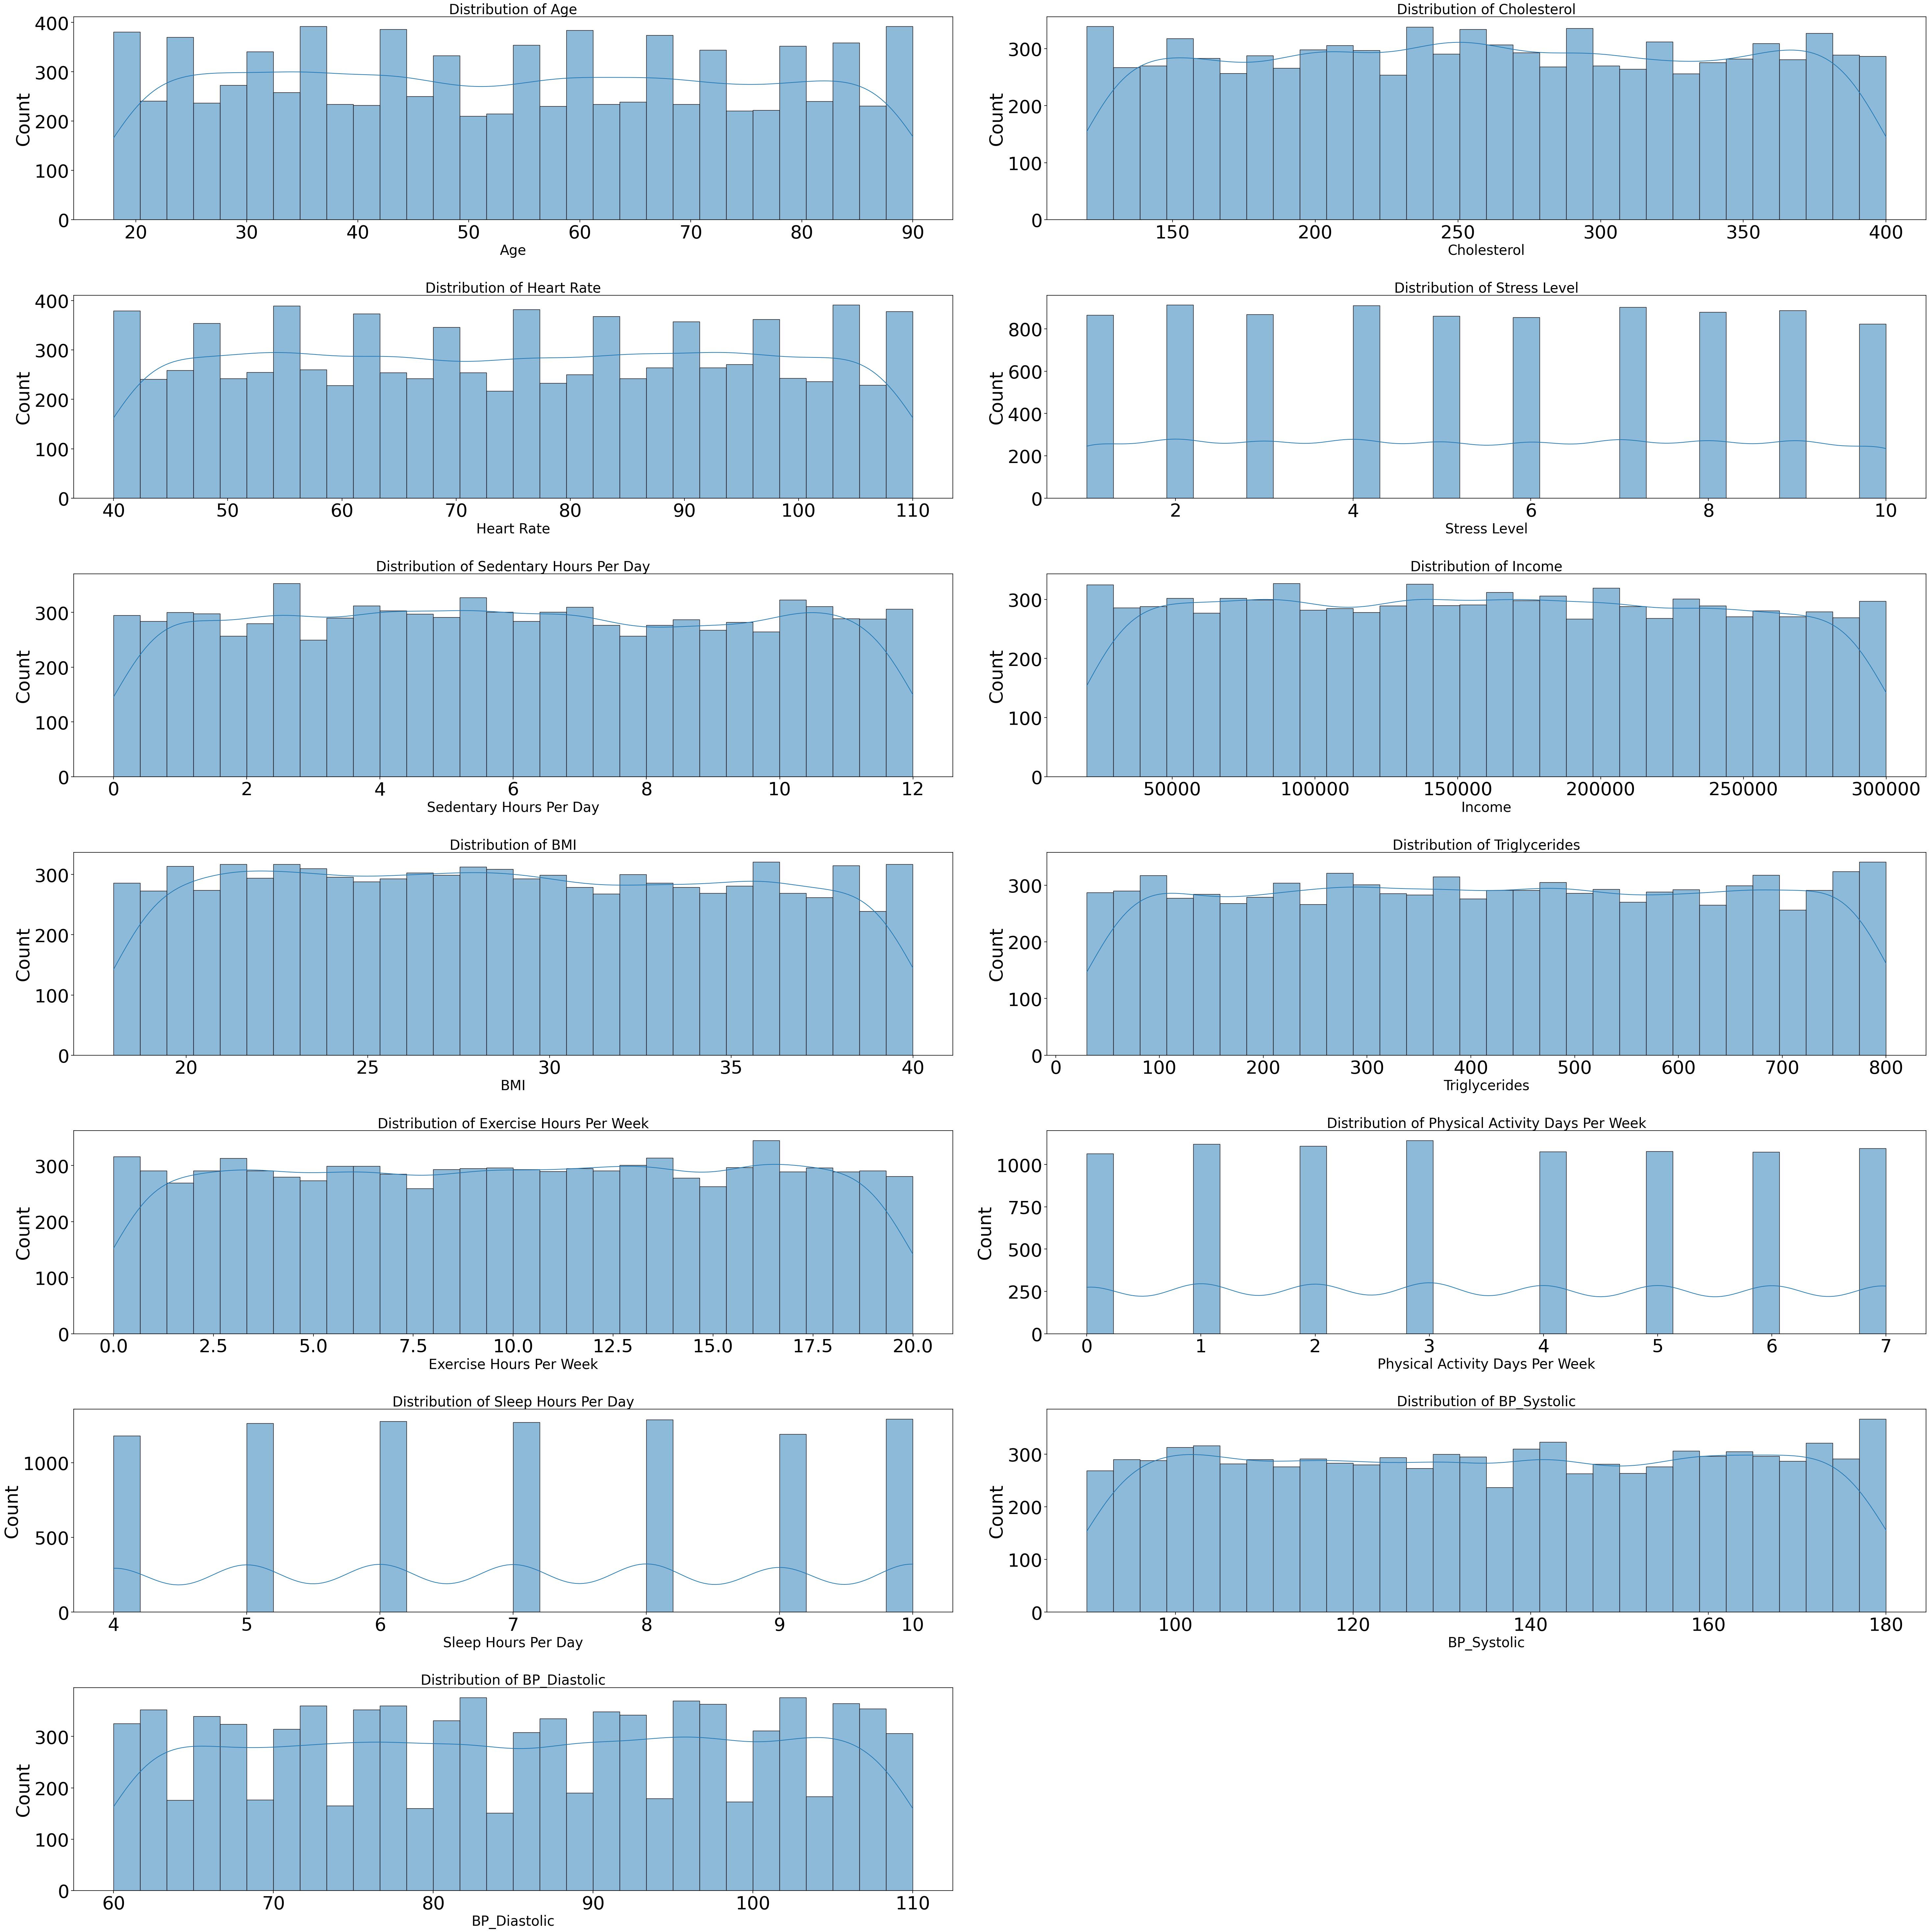

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reference - https://www.geeksforgeeks.org/data-visualization/plotting-histogram-in-python-using-matplotlib/
sns.set_context("notebook", font_scale=4.0)
plt.rcParams.update({'axes.titlesize': 50, 'axes.labelsize': 40, 'xtick.labelsize': 40, 'ytick.labelsize': 40})

# Plot
plt.figure(figsize=(60, 60))
for i, col in enumerate(numeric_cols[:15], 1):
    plt.subplot(7, 2, i)
    sns.histplot(df_heartattack[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}', fontsize=30)
    plt.xlabel(col, fontsize=30)
plt.tight_layout()
plt.show()


### Numerical Features Summary 

Majority of patients are in the middle-aged years and above with a high average blood cholesterol and triglyceride concentrations indicating high cardiovascular risk. A few of the features such as income, sedentary time and body mass index exhibit considerable differences and possible outliers, and so they might need normalization or some transformation during the preprocessing.

### Categorical Feature Overview

We now explore the categorical variables in the dataset. These features typically represent binary or discrete values such as health conditions, lifestyle choices, and geographical indicators.

The key categorical features include:

- **Sex** (Male/Female)
- **Diabetes** (Yes/No)
- **Family History** (1 = Yes, 0 = No)
- **Smoking** (1 = Smoker, 0 = Non-smoker)
- **Obesity** (1 = Obese, 0 = Not Obese)
- **Alcohol Consumption** (None, Light, Moderate, Heavy)
- **Diet** (Healthy, Average, Unhealthy)
- **Previous Heart Problems** (1 = Yes, 0 = No)
- **Medication Use** (1 = Yes, 0 = No)
- **Country**, **Continent**, and **Hemisphere**

We begin by examining the unique value counts for each and then visualize selected features.

In [5]:
cat_cols = [
    'Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
    'Diet', 'Previous Heart Problems', 'Medication Use', 'Country', 'Continent', 'Hemisphere'
]

# Display unique value counts for each categorical feature
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df_heartattack[col].value_counts())


--- Sex ---
Sex
Male      6111
Female    2652
Name: count, dtype: int64

--- Diabetes ---
Diabetes
1    5716
0    3047
Name: count, dtype: int64

--- Family History ---
Family History
0    4443
1    4320
Name: count, dtype: int64

--- Smoking ---
Smoking
1    7859
0     904
Name: count, dtype: int64

--- Obesity ---
Obesity
1    4394
0    4369
Name: count, dtype: int64

--- Alcohol Consumption ---
Alcohol Consumption
1    5241
0    3522
Name: count, dtype: int64

--- Diet ---
Diet
Healthy      2960
Average      2912
Unhealthy    2891
Name: count, dtype: int64

--- Previous Heart Problems ---
Previous Heart Problems
0    4418
1    4345
Name: count, dtype: int64

--- Medication Use ---
Medication Use
0    4396
1    4367
Name: count, dtype: int64

--- Country ---
Country
Germany           477
Argentina         471
Brazil            462
United Kingdom    457
Australia         449
Nigeria           448
France            446
Canada            440
China             436
New Zealand       435


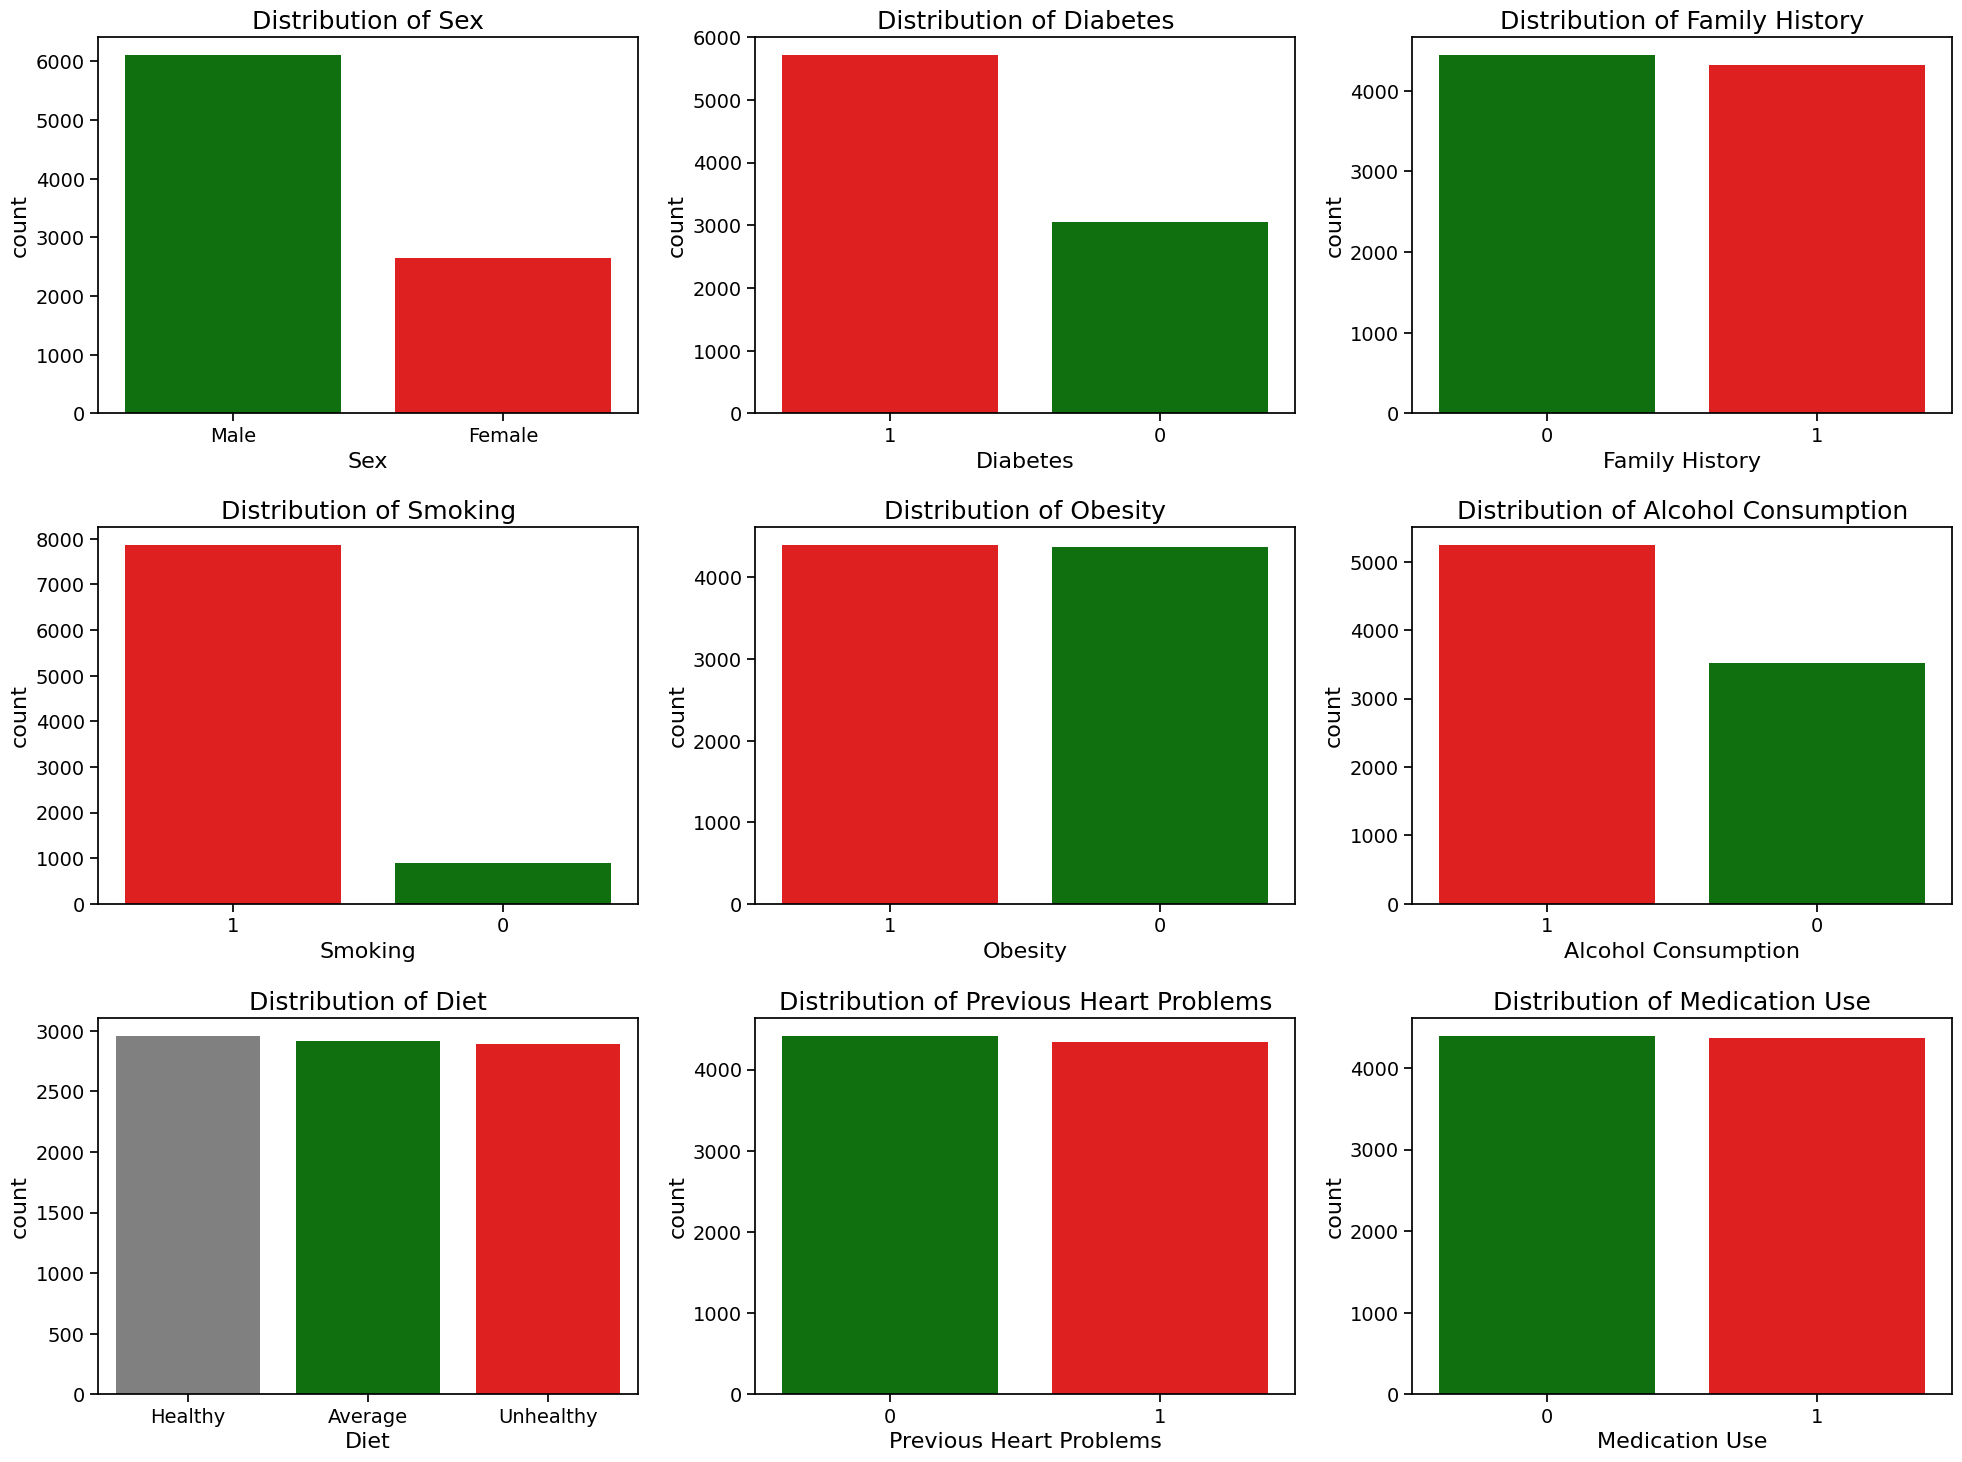

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("notebook", font_scale=1.6)
plt.rcParams.update({'axes.titlesize': 18, 'axes.labelsize': 16, 'xtick.labelsize': 14, 'ytick.labelsize': 14})

# Selected categorical features
selected_cats = [
    'Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
    'Alcohol Consumption', 'Diet', 'Previous Heart Problems', 'Medication Use'
]

red_green_palette = ['green', 'red']

#Reference https://www.geeksforgeeks.org/python/barplot-using-seaborn-in-python/
# Plot
plt.figure(figsize=(20, 15))

for i, col in enumerate(selected_cats):
    plt.subplot(3, 3, i + 1)
    
    unique_vals = df_heartattack[col].nunique()
    if unique_vals == 2:
        sns.countplot(data=df_heartattack, x=col, hue=col, order=df_heartattack[col].value_counts().index,
                      palette=red_green_palette, legend=False)
    else:
       
        sns.countplot(data=df_heartattack, x=col, hue=col, order=df_heartattack[col].value_counts().index,
                      palette=sns.color_palette(['green', 'red', 'gray']), legend=False)
    
    plt.title(f'Distribution of {col}', fontsize=18)
    plt.xlabel(col, fontsize=16)
    plt.xticks()

plt.tight_layout()
plt.show()


### Categorical Features Summary 
The dataset shows a balanced distribution for key health factors like obesity and medication use, but smoking is heavily skewed toward smokers. Gender and diabetes status have notable class imbalances. Geographic diversity is good, with most records from the Northern Hemisphere and Asia. **These insights suggest careful handling of imbalanced classes and potential regional analysis in modeling.**

## Relationship Exploration: Features vs Heart Attack Risk

This section explores relationships between features and the target variable `Heart Attack Risk`.

### Numeric Features
- Compute correlation between numeric features and the target.
- Visualize correlations using a heatmap.

### Categorical Features
- Generate count plots for selected categorical features grouped by heart attack risk.
- Compare the distribution of categories across the target classes.


Correlation of Numeric Features with Heart Attack Risk:

Heart Attack Risk                  1.000000
Cholesterol                        0.019340
BP_Systolic                        0.018585
Diabetes                           0.017225
Exercise Hours Per Week            0.011133
Triglycerides                      0.010471
Income                             0.009628
Age                                0.006403
Medication Use                     0.002234
Previous Heart Problems            0.000274
BMI                                0.000020
Family History                    -0.001652
Smoking                           -0.004051
Stress Level                      -0.004111
Heart Rate                        -0.004251
Physical Activity Days Per Week   -0.005014
Sedentary Hours Per Day           -0.005613
BP_Diastolic                      -0.007509
Obesity                           -0.013318
Alcohol Consumption               -0.013778
Sleep Hours Per Day               -0.018528
Name: Heart Attack 

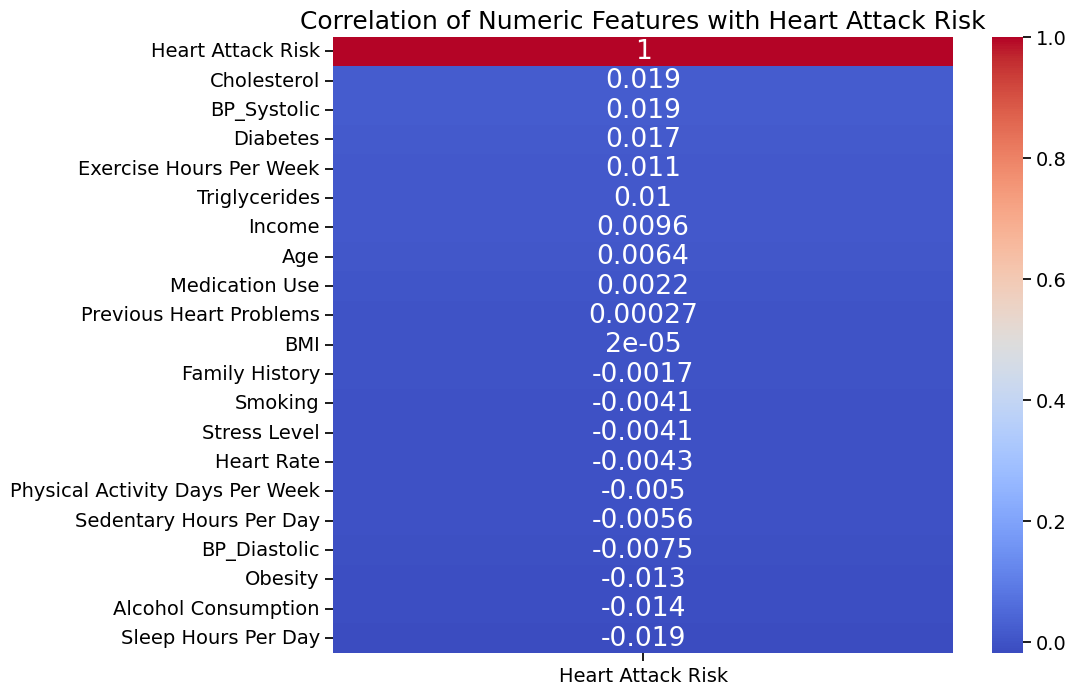

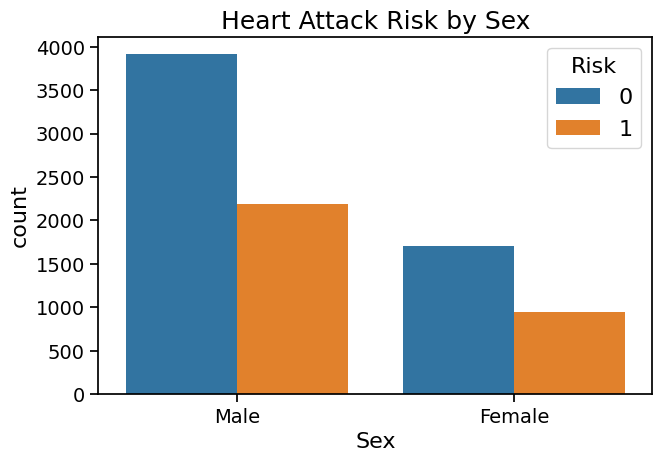


Counts for Sex by Heart Attack Risk:
Heart Attack Risk     0     1
Sex                          
Female             1708   944
Male               3916  2195


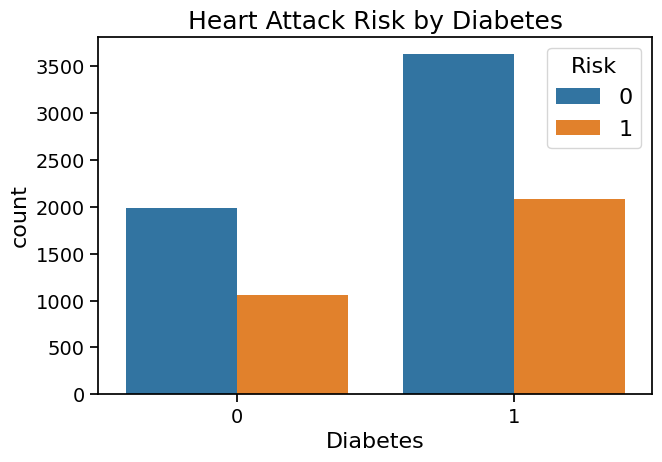


Counts for Diabetes by Heart Attack Risk:
Heart Attack Risk     0     1
Diabetes                     
0                  1990  1057
1                  3634  2082


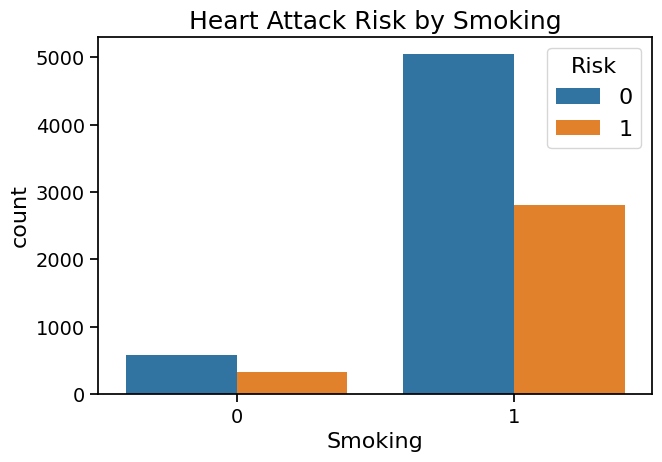


Counts for Smoking by Heart Attack Risk:
Heart Attack Risk     0     1
Smoking                      
0                   575   329
1                  5049  2810


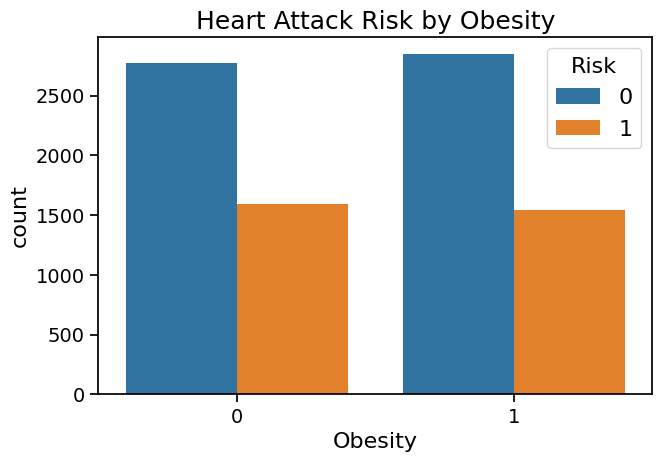


Counts for Obesity by Heart Attack Risk:
Heart Attack Risk     0     1
Obesity                      
0                  2776  1593
1                  2848  1546


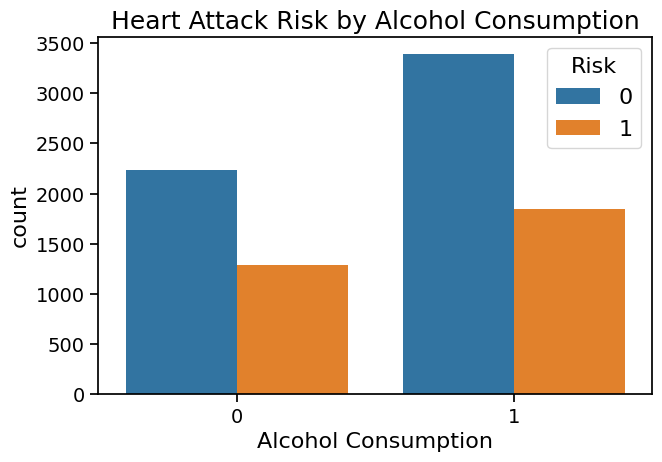


Counts for Alcohol Consumption by Heart Attack Risk:
Heart Attack Risk       0     1
Alcohol Consumption            
0                    2232  1290
1                    3392  1849


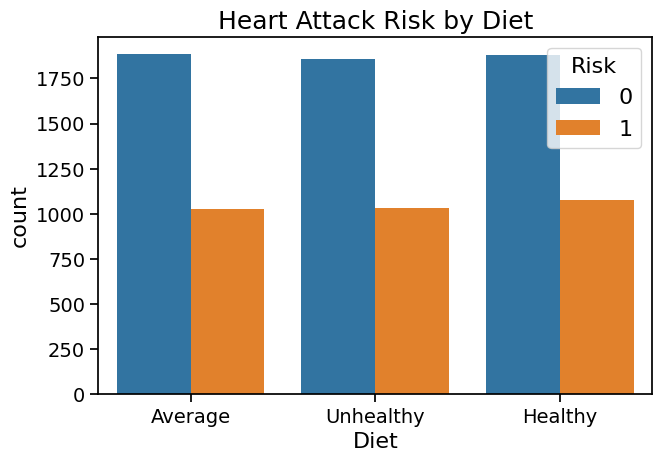


Counts for Diet by Heart Attack Risk:
Heart Attack Risk     0     1
Diet                         
Average            1886  1026
Healthy            1881  1079
Unhealthy          1857  1034


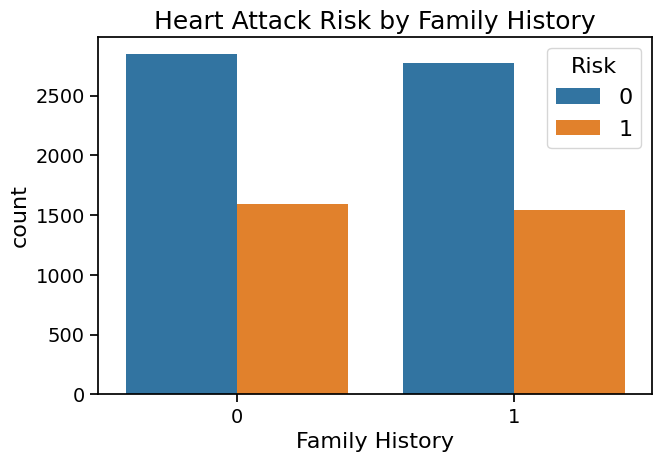


Counts for Family History by Heart Attack Risk:
Heart Attack Risk     0     1
Family History               
0                  2848  1595
1                  2776  1544


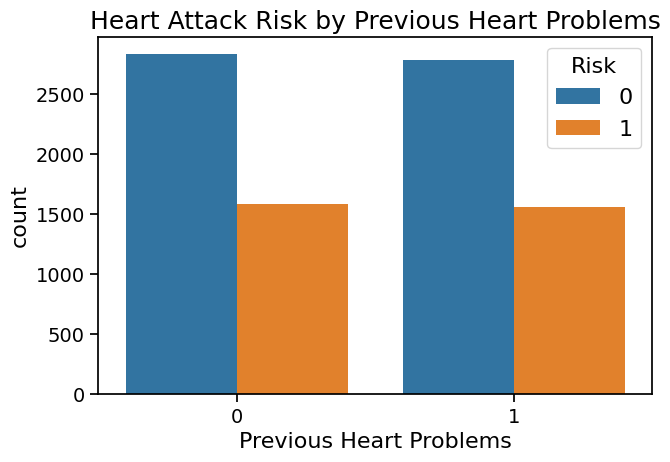


Counts for Previous Heart Problems by Heart Attack Risk:
Heart Attack Risk           0     1
Previous Heart Problems            
0                        2836  1582
1                        2788  1557


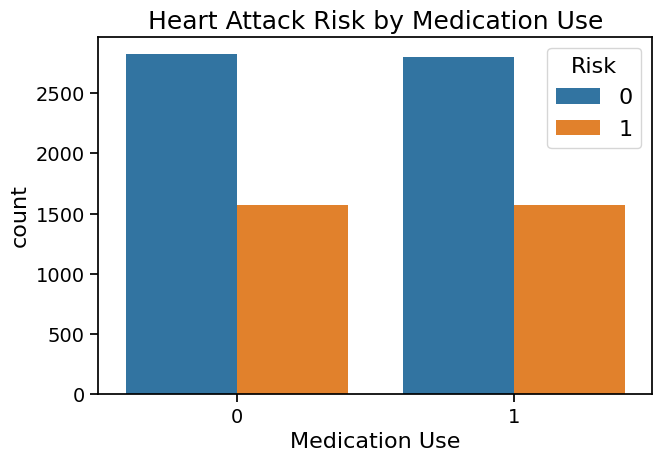


Counts for Medication Use by Heart Attack Risk:
Heart Attack Risk     0     1
Medication Use               
0                  2826  1570
1                  2798  1569


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_heartattack['Heart Attack Risk'] = df_heartattack['Heart Attack Risk'].astype(int)

# Reference - https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
correlation = df_heartattack.corr(numeric_only=True) # Heatmap for correlation of the numeric and target variable

print("Correlation of Numeric Features with Heart Attack Risk:\n")
print(correlation['Heart Attack Risk'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation[['Heart Attack Risk']].sort_values(by='Heart Attack Risk', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title('Correlation of Numeric Features with Heart Attack Risk')
plt.show()

categorical_features = ['Sex', 'Diabetes', 'Smoking', 'Obesity', 'Alcohol Consumption',
                        'Diet', 'Family History', 'Previous Heart Problems', 'Medication Use']

for feature in categorical_features:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(x=feature, hue='Heart Attack Risk', data=df_heartattack)
    plt.title(f'Heart Attack Risk by {feature}')
    
    plt.legend(title='Risk', fontsize='small', title_fontsize='small', loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nCounts for {feature} by Heart Attack Risk:") #  Print counts by category and heart attack risk
    print(pd.crosstab(df_heartattack[feature], df_heartattack['Heart Attack Risk']))


### Relationship Summary

Numeric features show very weak correlation with heart attack risk, suggesting no single strong predictor. Diabetes and smoking stand out as key risk factors among categorical variables. The dataset has some class imbalance but no major missing data issues.

## Data Quality Check

To ensure the dataset is reliable for analysis, we check for missing values, inconsistent entries, and outliers. This includes:

- Verifying if any columns contain null or NA values.  
- Reviewing data types and unique values to spot inconsistencies.  
- Using summary statistics and boxplots to identify potential outliers.

Missing values per column:
 No missing values.

Column: Patient ID
Data Type: object
Unique values (sample): ['BMW7812' 'CZE1114' 'BNI9906' 'JLN3497' 'GFO8847' 'ZOO7941' 'WYV0966'
 'XXM0972' 'XCQ5937' 'FTJ5456']

Column: Age
Data Type: int64
Unique values (sample): [67 21 84 66 54 90 20 43 73 71]

Column: Sex
Data Type: object
Unique values (sample): ['Male' 'Female']

Column: Cholesterol
Data Type: int64
Unique values (sample): [208 389 324 383 318 297 358 220 145 248]

Column: Heart Rate
Data Type: int64
Unique values (sample): [ 72  98  73  93  48  84 107  68  55  97]

Column: Diabetes
Data Type: int64
Unique values (sample): [0 1]

Column: Family History
Data Type: int64
Unique values (sample): [0 1]

Column: Smoking
Data Type: int64
Unique values (sample): [1 0]

Column: Obesity
Data Type: int64
Unique values (sample): [0 1]

Column: Alcohol Consumption
Data Type: int64
Unique values (sample): [0 1]

Column: Exercise Hours Per Week
Data Type: float64
Unique values (sample): [ 4.16

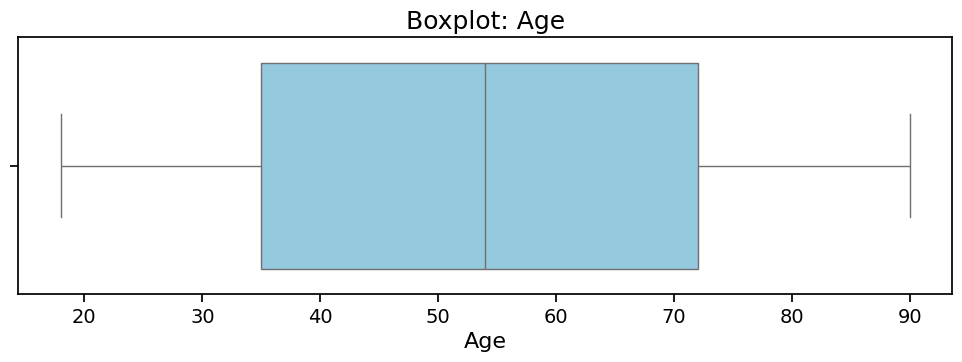

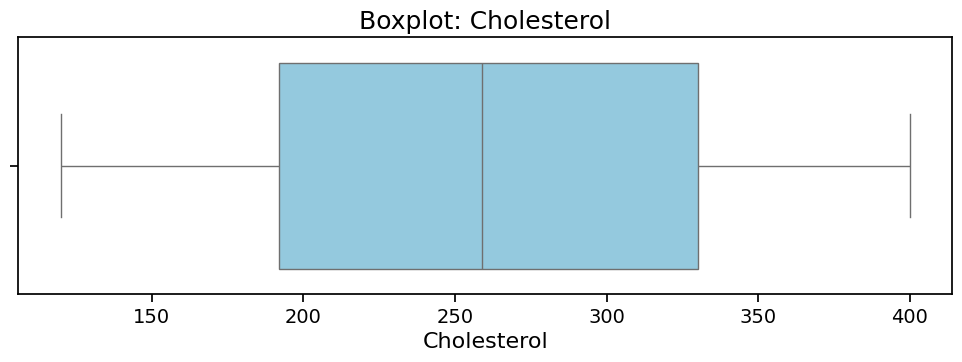

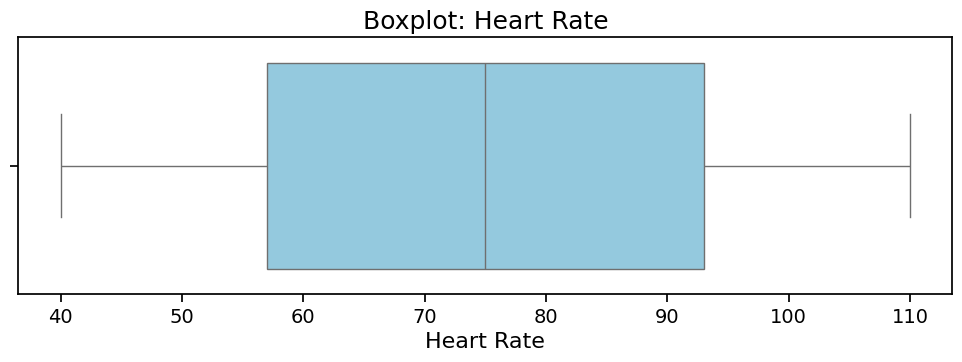

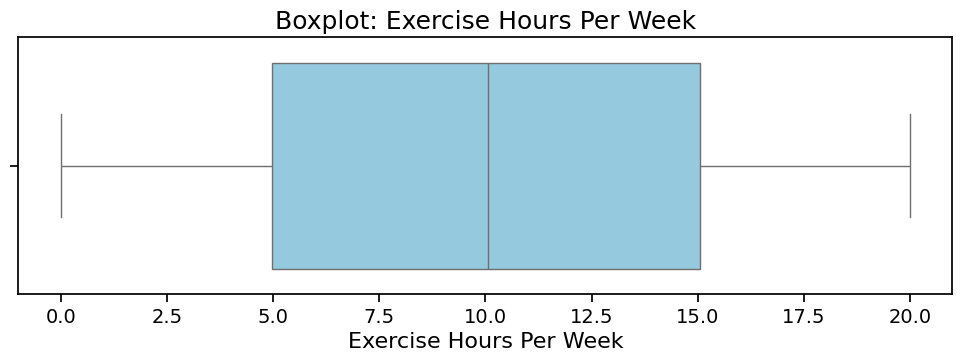

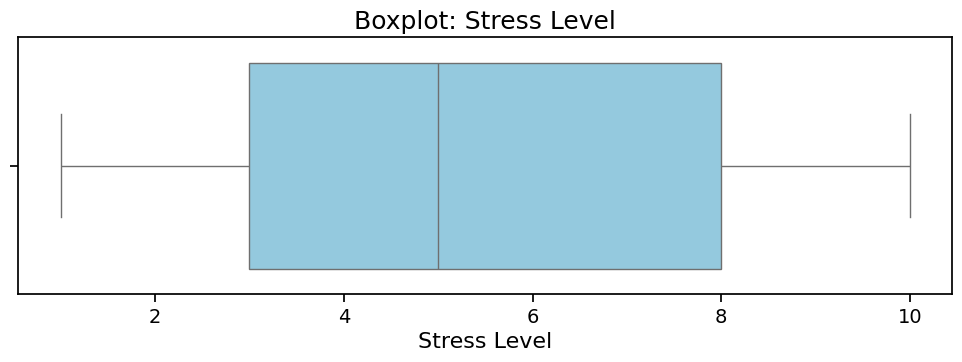

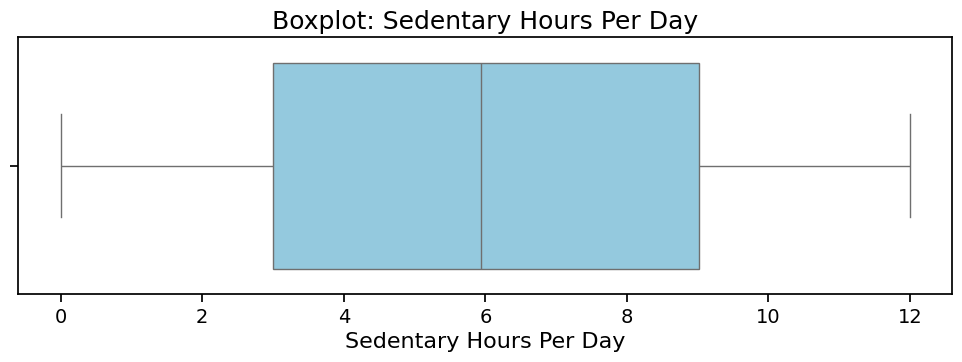

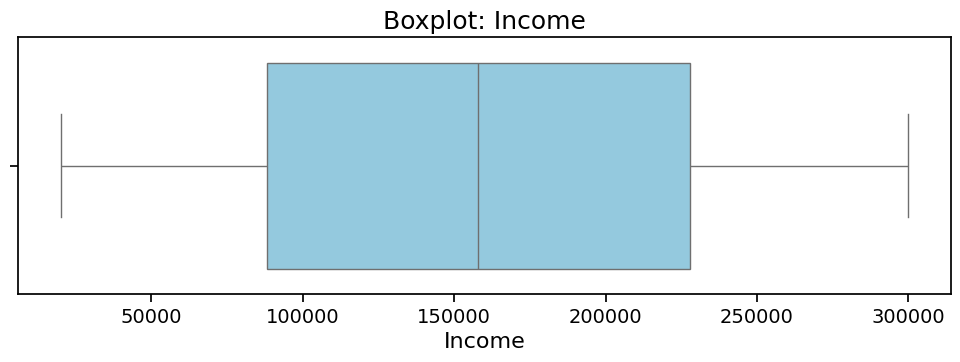

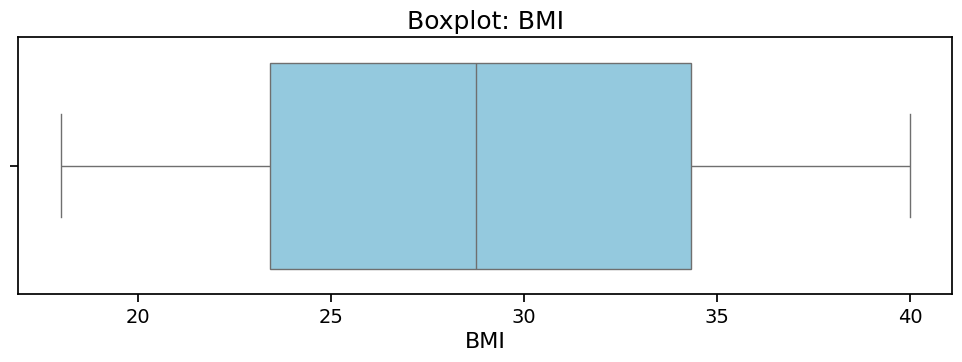

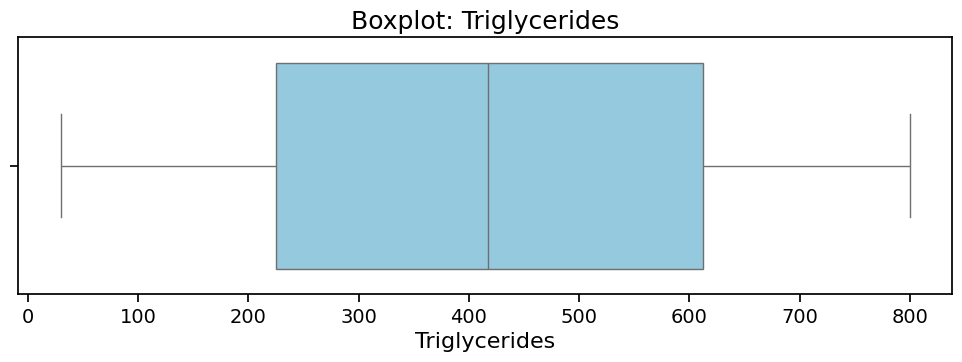

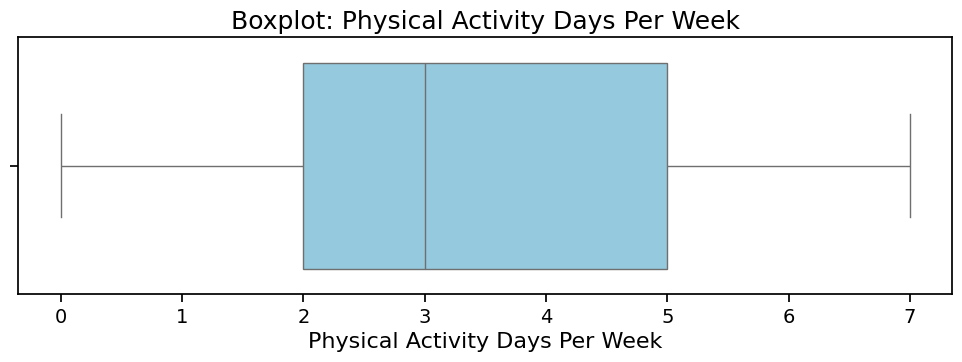

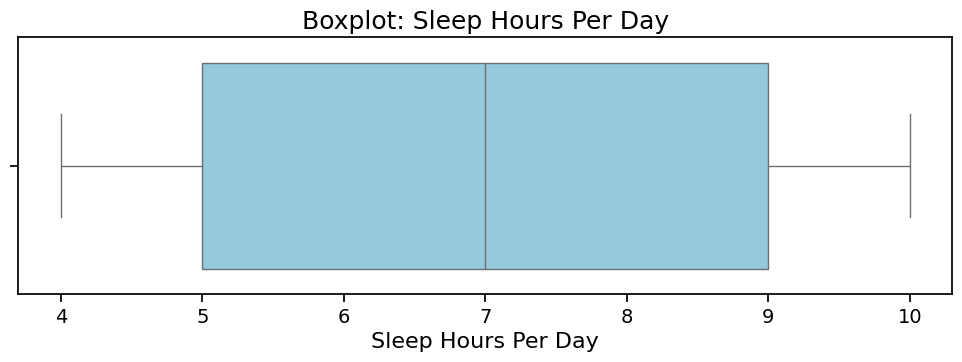

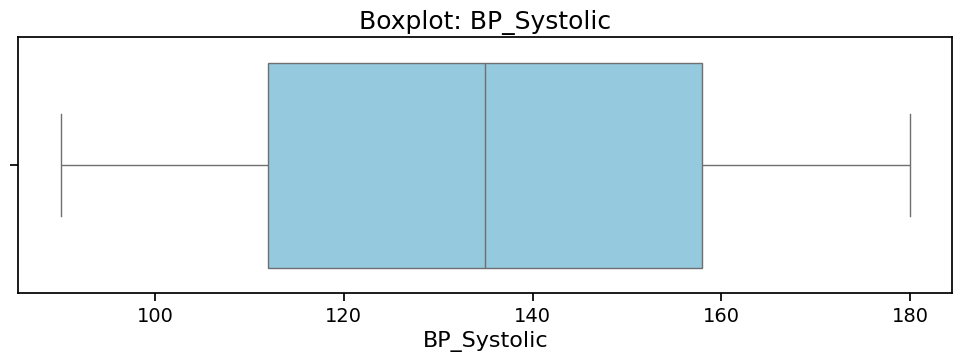

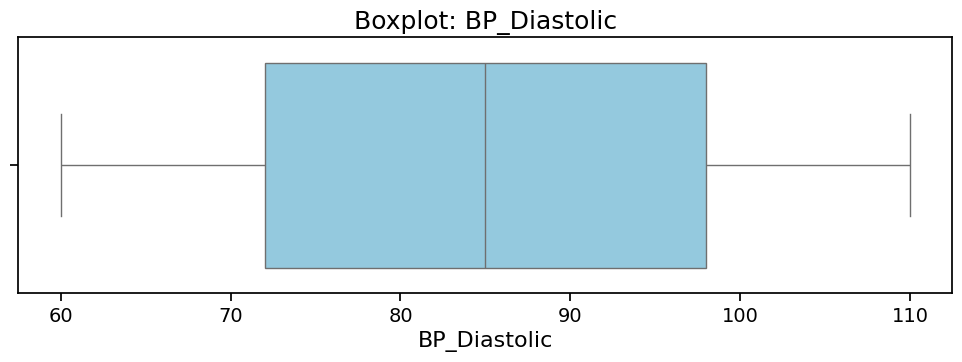

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

missing = df_heartattack.isnull().sum()  # Check for null values or missing values
print("Missing values per column:\n", missing[missing > 0] if missing.sum() > 0 else "No missing values.")

for col in df_heartattack.columns:   # Check the data types and uniqvue values to confirm if data makes sense
    print(f"\nColumn: {col}")
    print(f"Data Type: {df_heartattack[col].dtype}")
    print("Unique values (sample):", df_heartattack[col].unique()[:10])

print("\nSummary statistics for numeric columns:")
print(df_heartattack.describe())

binary_vars = ['Diabetes', 'Smoking', 'Obesity', 'Alcohol Consumption',
               'Medication Use', 'Previous Heart Problems', 'Family History', 'Heart Attack Risk']

numeric_cols = df_heartattack.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Reference - https://medium.com/@marc.bolle/5-easy-ways-to-detect-outliers-in-python-b07639ba32d5

boxplot_cols = [col for col in numeric_cols if col not in binary_vars]
outlier_counts = {}

for col in boxplot_cols:                        # Check for outliers
    Q1 = df_heartattack[col].quantile(0.25)
    Q3 = df_heartattack[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_heartattack[(df_heartattack[col] < Q1 - 1.5 * IQR) | (df_heartattack[col] > Q3 + 1.5 * IQR)]
    outlier_counts[col] = outliers.shape[0]

print("Outliers per numeric feature (IQR method):")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

# Reference https://seaborn.pydata.org/generated/seaborn.boxplot.html

for col in boxplot_cols:
    plt.figure(figsize=(10, 4))  # wider for better resolution
    sns.boxplot(x=df_heartattack[col], color='skyblue', showfliers=True)  # explicitly show outliers
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()
    plt.show()


### Data Quality Summary

There is no missing data in the dataset and a combination of numeric and categorical variables. The Triglycerides and Cholesterol as the numeric variables are also disparate with none as statistical outlier according to the IQR approach demonstrating distribution with no outliers of the data. Some values are clinically high, but they are not abnormal compared to graphing the amount expected in people of this population. On the whole, the data looks clear and can be analyzed and modeled without any serious issues regarding outliers or missing values.


***

## **Task 2: Data Preparation & Modeling**
#### A. Data Splitting
The data is divided into training (70 percent), validation (15 percent), and test (15 percent), since the prediction is a supervised classification task (Heart Attack Risk). The split was stratified to preserve the class distribution to all subsets, which can help in avoiding bias and guaranteeing whether or not the model is effective.

The 70/15/15 percentage split is a compromise between having sufficient amounts of data to train, data to validate hyperparameters, and one test set which is not biased. Every split was stored as a CSV file, to be reproduced.

Reference - https://medium.com/@gunkurnia/choosing-the-optimal-data-split-for-machine-learning-80-20-vs-70-30-0fd266710236

### B. Preprocessing and Feature Engineering

Cleaning: Preliminary procedures to look at data quality indicated that neither missing values nor high outliers were present at all, and as such, no imputation or record deletion was involved. This enabled us to maintain all of the dataset to accommodate modeling. Had there been any missing values, there would have been imputation of median values in numerical features and poor records with missing values in target features would have been discarded to ensure training problems.

Encoding and Transformation: The numerical characteristics were standardized with StandardScaler to bring their scale to a more comparable standard that boosted performance on algorithms that are sensitive to feature size. One-hot code was applied to categorical variables to transform them to numeric representation that the machine learning model works with. Data could leak during encoding so it was applied to training set only and consistently applied in validation and test set.

Columns that were unlikely to add predictive information- identifiers (Patient ID), geographic features (Country, Continent, Hemisphere)- were unused to the split and limited noise and the potential leak of information.

The dimensionality reduction was not undertaken at this stage to preserve the information at hand except the normal feature selection.

In [9]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pdu

warnings.filterwarnings(
    "ignore", 
    message="Found unknown categories in columns .* during transform", 
    category=UserWarning,
    module="sklearn.preprocessing._encoders"
)

X = df_heartattack.drop(columns=['Heart Attack Risk', 'Patient ID', 'Country', 'Continent', 'Hemisphere'])  # Drop non-predictive columns before splitting
y = df_heartattack['Heart Attack Risk']


X_temp, X_test, y_temp, y_test = train_test_split(           # Data spliting 85 Training & Validation, 15 Test
    X, y, test_size=0.15, stratify=y, random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(                # 85 Training split to 70, 15 for training and validation respectively
    X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42
)

X_train.to_csv('train.csv', index=False)                # Saving as CSV files for reproducibility
X_valid.to_csv('valid.csv', index=False)
X_test.to_csv('test.csv', index=False)
y_train.to_csv('train_labels.csv', index=False)
y_valid.to_csv('valid_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)


num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

scaler = StandardScaler()            # Standardizing the numerical features
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_valid[num_cols] = scaler.transform(X_valid[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


# Reference https://www.datacamp.com/tutorial/one-hot-encoding-python-tutorial
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')  # One-hot encoding the categorical features
encoder.fit(X_train[cat_cols])

X_train_cat = pd.DataFrame(
    encoder.transform(X_train[cat_cols]),
    index=X_train.index,
    columns=encoder.get_feature_names_out(cat_cols)
)
X_valid_cat = pd.DataFrame(
    encoder.transform(X_valid[cat_cols]),
    index=X_valid.index,
    columns=encoder.get_feature_names_out(cat_cols)
)
X_test_cat = pd.DataFrame(
    encoder.transform(X_test[cat_cols]),
    index=X_test.index,
    columns=encoder.get_feature_names_out(cat_cols)
)

X_train = X_train.drop(columns=cat_cols).join(X_train_cat)
X_valid = X_valid.drop(columns=cat_cols).join(X_valid_cat)
X_test = X_test.drop(columns=cat_cols).join(X_test_cat)



### C. Model Training – Initial Models

### Choice of Algorithms

In the process of selecting the algorithms, we must make an important decision or rather choice.

To deal with the problem of heart attack risk classification, I chose five models of machine learning that have different advantages and would be appropriate to use regarding the characteristics of the dataset that consists of both categorical and numerical features:

- **Logistic Regression**

Complexity is simple, and interpretable; hence, it is chosen as a baseline model. It means it is applicable on linear classification and gives probabilistic answers that are helpful in explaining confidence in prediction.

- **Naive Bayes**

It was chosen because it was efficient and has a probabilistic solution using the Bayes theorem. It also assumes feature independence, and therefore may make modeling simple, often performing acceptably on numeric and categorical data together. Is a good starting point of classification tasks.

- **Support Vector Machine (SVM)**

It was selected because of the effectiveness in dealing with high-dimension data and the capability of modeling complex nonlinear decision boundary by using kernel functions. When classification needs to be done and classes are not necessarily linearly separable, SVMs can deliver a good performance when feature scaling is done correctly.

- **K-Nearest Neighbors (k-NN)**

It was selected due to its simplicity and the fact that it is not parametric. k-NN predictions are made according to the nearest training examples in the feature space, which can be effective when decision boundary is not regular or not effectively represented by a linear model. It is however susceptible to feature scaling, and less efficient when faced with very large datasets or too many dimensions.

- **Random Forest**

It was selected because it has an ensemble of decision trees that increases the accuracy and minimizes the overfitting. It deals well with mixed data types and has the ability to capture complex patterns, and also do not require much heavy tuning to perform well in this classification task.

References - https://www.learndatasci.com/glossary/binary-classification/
, https://arxiv.org/html/2409.03697v1, https://medium.com/@andrii.gozhulovskyi/choosing-a-model-for-binary-classification-problem-f211f7a4e263


### (1) Model Training: Logistic Regression
Rationale:

The Logistic Regression is a basic linear model and it is mostly employed to solve binary classification issues. It is interpretable and efficient because it can model the probability of the target class using logistic. The task of Heart Attack Risk can be treated as a classification problem, and as such, Logistic Regression is a reasonable choice of a baseline to test. It is useful in cases where features are used in the association with the target that is roughly linear and it is capable of supplying probabilistic answers that are useful when further analysis is to be undertaken.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

# Initialize the Logistic Regression model
heart_attack_risk_logreg = LogisticRegression(max_iter=700, random_state=2)

# Train the model on the training data
heart_attack_risk_logreg.fit(X_train, y_train)

# Predict on training set and validation set
y_train_pred = heart_attack_risk_logreg.predict(X_train)
y_valid_pred = heart_attack_risk_logreg.predict(X_valid)

# Check accuracy to verify model training
train_accuracy = accuracy_score(y_train, y_train_pred)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {valid_accuracy:.4f}")

# Save the initial model to a file
joblib.dump(heart_attack_risk_logreg, 'heart_attack_risk_logreg_v1.pkl')

Training Accuracy: 0.6418
Validation Accuracy: 0.6418


['heart_attack_risk_logreg_v1.pkl']

**Summary** - 
The Logistic Regression model achieved 64.18% training accuracy and same validation accuracy. This suggests that the model is always predicting the majority class to minimize the loss.

### (2) Model Training – Naive Bayes
Rationale:

Naive Bayes classifiers are simple, fast, and effective, especially for classification problems involving both categorical and numerical data. Despite the naive assumption that features are independent, Naive Bayes often performs well in practice. It’s a good baseline model and useful for probabilistic classification, providing class probabilities which can inform further decision-making.



In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize the Gaussian Naive Bayes model
heart_attack_risk_nb = GaussianNB()

# Train the model on the training set
heart_attack_risk_nb.fit(X_train, y_train)

# Predict on training and validation sets
y_train_pred = heart_attack_risk_nb.predict(X_train)
y_valid_pred = heart_attack_risk_nb.predict(X_valid)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {valid_accuracy:.4f}")

joblib.dump(heart_attack_risk_nb, 'heart_attack_risk_nb_v1.pkl')

Training Accuracy: 0.6418
Validation Accuracy: 0.6418


['heart_attack_risk_nb_v1.pkl']

**Summary** - The Naive Bayes model also achieved 64.18% training accuracy and same validation accuracy. This suggests that the model is always predicting the majority class to minimize the loss.

### (3) Model Training - Support Vector Machine (SVM)
Rationale:

SVM is a strong classification method which finds success in linear and non linear data using the kernel functions. It can particularly solve problems in high-dimensional spaces and identify optimal separating hyperplanes maximizing the inter-class separation. SVM can also take advantage of this since our dataset has both continuous and categorical values since they are already encoded and scaled features. Starting with linear kernel provides simplicity and efficiency and the kernel can be later tuned by choice.

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize SVM with linear kernel and a fixed random state for reproducibility
heart_attack_risk_svm = SVC(kernel='linear', random_state=42)

# Train the SVM model on the training data
heart_attack_risk_svm.fit(X_train, y_train)

# Evaluate on training set
train_preds = heart_attack_risk_svm.predict(X_train)
train_acc = accuracy_score(y_train, train_preds)

# Evaluate on validation set
valid_preds = heart_attack_risk_svm.predict(X_valid)
valid_acc = accuracy_score(y_valid, valid_preds)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {valid_acc:.4f}")

joblib.dump(heart_attack_risk_svm, 'heart_attack_risk_svm_v1.pkl')

Training Accuracy: 0.6418
Validation Accuracy: 0.6418


['heart_attack_risk_svm_v1.pkl']

**Summary** - The Support Vector Machine (SVM) model with a linear kernel also achieved 64.18% training accuracy and same validation accuracy. This suggests that the model is always predicting the majority class to minimize the loss.

### (4) Model Training - K-Nearest Neighbours 
Rationale:

k-Nearest Neighbors (k-NN) learns the likelihood of labels depending on the shortest training examples and makes no distribution Assumption. It is compatible with structured data, and similar points have labels in common, and it needs scaling the features, which was performed with StandardScaler. Although when working with a big dataset k-NN may be rather slow, a good selection of the algorithm can help to work with it.
𝑘
k aids in making it efficient.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize k-NN classifier with k=5 
heart_attack_risk_knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
heart_attack_risk_knn.fit(X_train, y_train)

# Predict on training data
train_preds = heart_attack_risk_knn.predict(X_train)
train_acc = accuracy_score(y_train, train_preds)

# Predict on validation data
valid_preds = heart_attack_risk_knn.predict(X_valid)
valid_acc = accuracy_score(y_valid, valid_preds)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {valid_acc:.4f}")

joblib.dump(heart_attack_risk_knn, 'heart_attack_risk_knn_v1.pkl')

Training Accuracy: 0.7236
Validation Accuracy: 0.5460


['heart_attack_risk_knn_v1.pkl']

**Summary** - The K-NN model achieved a training accuracy of 72.33% and a validation accuracy of 54.75%, indicating it learned from the training data but showed moderate generalization to unseen data. This suggests some overfitting or that k-NN may struggle slightly with this dataset’s complexity.

### (5) Model Training - Random Forest
Rationale:

Random Forest is a method of ensemble learning which creates a set of decision tree and combines their predictions to return a better precision and prevent overfitting. It is able to deal with both numeric and categorical features efficiently, and it captures nonlinear relationships in complex situations and also it is less sensitive to noise and outliers. This makes it adaptable to the work of the heart attack risk classification task where correlations between features may be complex.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize Random Forest with 100 trees and fixed random state for reproducibility
heart_attack_risk_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
heart_attack_risk_rf.fit(X_train, y_train)

# Predict on training data
train_preds = heart_attack_risk_rf.predict(X_train)
train_acc = accuracy_score(y_train, train_preds)

# Predict on validation data
valid_preds = heart_attack_risk_rf.predict(X_valid)
valid_acc = accuracy_score(y_valid, valid_preds)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {valid_acc:.4f}")

joblib.dump(heart_attack_risk_rf, 'heart_attack_risk_rf_v1.pkl')

Training Accuracy: 1.0000
Validation Accuracy: 0.6289


['heart_attack_risk_rf_v1.pkl']

**Summary** - 
The Random Forest model achieved perfect accuracy on the training set, indicating it fully learned the training data patterns. On the validation set, it reached a solid accuracy of 62.89%, showing better generalization than previous models but also some overfitting. Overall, it demonstrates strong potential for this classification task.

### Initial Results

All models have been trained successfully, and it is evident that data preprocessing and modeling pipelines are working as expected. Nevertheless, the results of validation indicate the problems of the classes imbalance and possible overfitting.

Naive Bayes, SVM, and Logistic Regression predict about 64 percent validation success, which means that they predict the majority class only.

k-NN displays training accuracy of 72.36 percent and validation accuracy of 54.60 percent indicating that k-NN is more capable of learning the patterns contained within the data but can be noisy, or have poorly selected parameters.

Random forest obtains complete training accuracy with only 62.89 percent validation accuracy, a strong sign of overfitting- the model over-learns the training data without generalizing it well.

Such findings indicate that data imbalance should be addressed, resampling should be looked at and that hyperparameter tuning needs to be carried out to better generalise and detect minority class.


***

## **Task 3: Evaluation**
### A. Selection of Evaluation Metrics
I have chosen the following indicators to assess performance of models to predict the risk of heart attack:

**Accuracy:** 
Activity calculates the percentage of accurate predictions among all the predictions. Although it gives us a picture of the overall performance, it may be distorted in skewed datasets in which most of the classes predominate.

**Precision & Recall:**
Precision: Percent of calculated positives that are actually positive. Noteworthy in reduction of false alarms.

Recall (Sensitivity): rate of correctly detected positive actual cases. Most important in medical diagnosis, in which failure to detect high-risk patients (false negatives) may be life-threatening.

**F1-Score:**
The mean of the precisions and recalls. It is a fair assessment when the expenses of false positives and false negatives are not equated - which is the case, here.

**Confusion Matrix:**
Separation of true positives, false positives, true negatives and false negatives - providing an idea of what kind of error the model has, and how it can be improved.

**Rationale in the choice of Metrics:**
It would be wrong to rely only on the accuracy since there is a class imbalance in the dataset. A naive majority-class classifier will have about 60 percent accuracy and recognizes no true positives. In this way, our priority is:

Recall: In order to identify most patients at high risk.

F1-Score: To balance between the number of false alarms and recall and precision without focusing on one of them.

These measures are explained by the requirements of medical practice, in which the cost of false negative (a missed diagnosis) is significantly greater than that of false positive (a false alarm).
Baseline Comparison
A basic majority-class baseline has an accuracy of ~60%. Such a gain is necessary: a useful model therefore has to perform significantly better than this baseline, not only in terms of accuracy, but more importantly in recall and F1-score.

**Supporting Literature**
S. Palaniappan & R. Awang (2008)
"Intelligent Heart Disease Prediction System using Data Mining Techniques."
International Journal of Computer Science and Network Security.
Google Scholar

Alizadehsani, R. et al. (2018)
"Machine learning-based decision support system for early detection of coronary artery disease."
Informatics in Medicine Unlocked, Volume 16, 2019.
DOI: 10.1016/j.imu.2019.100204
→ Recommends F1-score, and recall as primary evaluation metrics due to data imbalance and diagnostic risk.

**Baseline Comparison**
A simple majority-class baseline achieves ~60% accuracy. Therefore, any useful model must substantially outperform this baseline — not only in accuracy but more importantly in recall and F1-score — to be considered effective for medical decision-making.

### B. Training vs Validation Evaluation
Below is a summary of model performance on both training and validation sets:

| Model               | Training Accuracy | Validation Accuracy | Observations                              |
|--------------------|-------------------|----------------------|-------------------------------------------|
| Logistic Regression| 0.6418           | 0.6418                | Seems to be biased towards one side  |
| Naive Bayes        | 0.6418             | 0.6418                |  Seems to be biased towards one side   |
| SVM (Linear Kernel)| 0.6418             | 0.6418                |  Seems to be biased towards one side   |
| k-NN (k=5)         | 0.7233            | 0.5475               | Slight overfitting, sensitive to scaling |
| Random Forest      | 1.0000            | 0.6418               | Overfitting but best generalization  |



In [15]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define model names and objects
models = {
    "Logistic Regression": heart_attack_risk_logreg,
    "Naive Bayes": heart_attack_risk_nb,
    "SVM": heart_attack_risk_svm,
    "k-NN": heart_attack_risk_knn,
    "Random Forest": heart_attack_risk_rf
}

# Store results and predictions for error analysis
results = []
predictions = {}

# Evaluate all models
# Reference - https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/
for name, model in models.items():
    # Predictions
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    predictions[name] = y_valid_pred  # Save predictions for error analysis

    # Evaluation metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    valid_acc = accuracy_score(y_valid, y_valid_pred)
    valid_precision = precision_score(y_valid, y_valid_pred, zero_division=0)
    valid_recall = recall_score(y_valid, y_valid_pred, zero_division=0)
    valid_f1 = f1_score(y_valid, y_valid_pred, zero_division=0)

    # Append to results
    results.append({
        "Model": name,
        "Train Accuracy": train_acc,
        "Validation Accuracy": valid_acc,
        "Precision": valid_precision,
        "Recall": valid_recall,
        "F1 Score": valid_f1
    })

    # Print classification report
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_valid, y_valid_pred, zero_division=0))

# Final results table
results_df = pd.DataFrame(results)
print("\nModel Evaluation Summary:")
print(results_df)



Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       844
           1       0.00      0.00      0.00       471

    accuracy                           0.64      1315
   macro avg       0.32      0.50      0.39      1315
weighted avg       0.41      0.64      0.50      1315


Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       844
           1       0.00      0.00      0.00       471

    accuracy                           0.64      1315
   macro avg       0.32      0.50      0.39      1315
weighted avg       0.41      0.64      0.50      1315


SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       844
           1       0.00      0.00      0.00       471

    accuracy                           0.64      1315
   macro avg  

### Evaluation Summary:
The reports about the classification point out a serious issue of class imbalance, where in most models the majority category (0) is prevailing in the predictions.

Logistic Regression, Naive Bayes, and SVM get about same validation accuracies on the order of 64 but fail utterly to recognize the minority class (class 1) and hence the precision, recall, and F1-scores of this class are exactly 0. This implies that the models are biased in terms of the prediction of the majority class.

k-NN demonstrates a slight step-up with 31 percent accuracy and 23 percent recall on class 1, which means that it is a bit sensitive to the minority class. Nevertheless, it is less valid in its general case (~55%), indicating that it has poor generalization.

Random Forest has the best training accuracy (100%) but fails to generalize, as the recall of class 1 is very low (~1%). It implies overfitting, the ability to model what is already known in practice and not outperform unknown data.

To sum up, on training data certain models may perform quite well but all have problems due to the low representation of the minority class. The logical next steps should include the balancing of the classes (undersampling) and changing the model parameters to increase the performance, especially the recall and the F1-score.

### C. Error Analysis

We examine misclassified examples for each model to understand common errors. A confusion matrix is used to identify which classes are often confused. Specific misclassified instances are reviewed to determine if errors stem from noisy or ambiguous inputs, class similarity, or other patterns the model struggles with.



Misclassified examples for Logistic Regression:
Total misclassified: 471
           Age  Cholesterol  Heart Rate  Diabetes  Family History   Smoking  \
8552  1.195834     0.919468   -0.145103  0.735496       -0.986557  0.344605   
5695  1.006113     0.771265   -0.096439  0.735496        1.013626  0.344605   
3012  1.195834     1.512281   -1.556355  0.735496        1.013626  0.344605   
4801 -1.080820    -1.575287    1.655461  0.735496        1.013626  0.344605   
2726  0.863822     0.907118   -0.485750  0.735496       -0.986557  0.344605   

       Obesity  Alcohol Consumption  Exercise Hours Per Week  \
8552 -1.005723             0.821999                -0.844979   
5695 -1.005723            -1.216546                 1.399005   
3012 -1.005723            -1.216546                 0.671179   
4801 -1.005723            -1.216546                 1.401080   
2726 -1.005723             0.821999                 0.121874   

      Previous Heart Problems  ...  Triglycerides  \
8552         

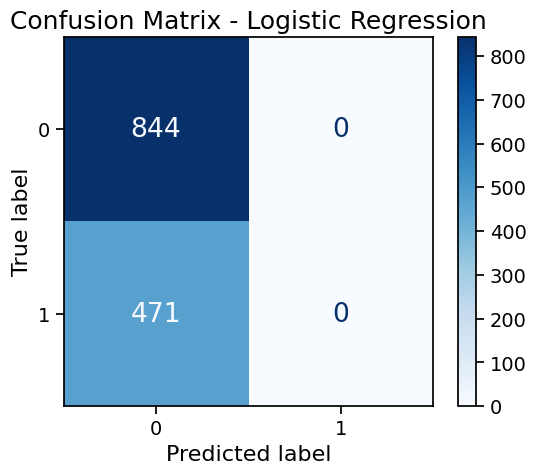


Misclassified examples for Naive Bayes:
Total misclassified: 471
           Age  Cholesterol  Heart Rate  Diabetes  Family History   Smoking  \
8552  1.195834     0.919468   -0.145103  0.735496       -0.986557  0.344605   
5695  1.006113     0.771265   -0.096439  0.735496        1.013626  0.344605   
3012  1.195834     1.512281   -1.556355  0.735496        1.013626  0.344605   
4801 -1.080820    -1.575287    1.655461  0.735496        1.013626  0.344605   
2726  0.863822     0.907118   -0.485750  0.735496       -0.986557  0.344605   

       Obesity  Alcohol Consumption  Exercise Hours Per Week  \
8552 -1.005723             0.821999                -0.844979   
5695 -1.005723            -1.216546                 1.399005   
3012 -1.005723            -1.216546                 0.671179   
4801 -1.005723            -1.216546                 1.401080   
2726 -1.005723             0.821999                 0.121874   

      Previous Heart Problems  ...  Triglycerides  \
8552                -

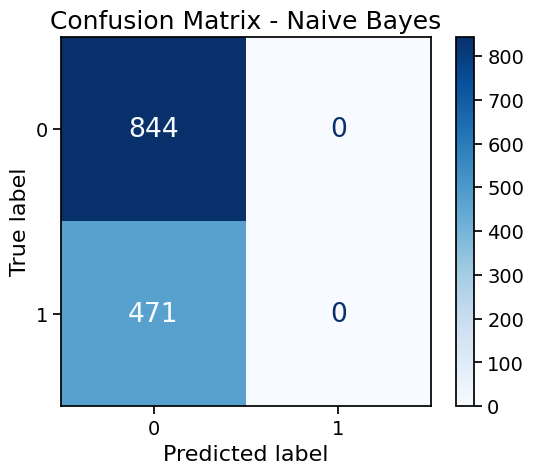


Misclassified examples for SVM:
Total misclassified: 471
           Age  Cholesterol  Heart Rate  Diabetes  Family History   Smoking  \
8552  1.195834     0.919468   -0.145103  0.735496       -0.986557  0.344605   
5695  1.006113     0.771265   -0.096439  0.735496        1.013626  0.344605   
3012  1.195834     1.512281   -1.556355  0.735496        1.013626  0.344605   
4801 -1.080820    -1.575287    1.655461  0.735496        1.013626  0.344605   
2726  0.863822     0.907118   -0.485750  0.735496       -0.986557  0.344605   

       Obesity  Alcohol Consumption  Exercise Hours Per Week  \
8552 -1.005723             0.821999                -0.844979   
5695 -1.005723            -1.216546                 1.399005   
3012 -1.005723            -1.216546                 0.671179   
4801 -1.005723            -1.216546                 1.401080   
2726 -1.005723             0.821999                 0.121874   

      Previous Heart Problems  ...  Triglycerides  \
8552                -0.983344

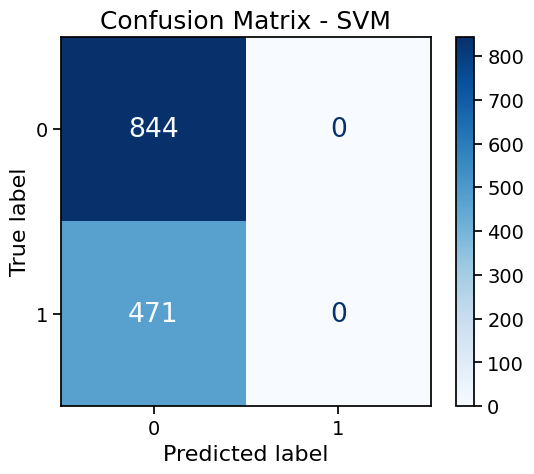


Misclassified examples for k-NN:
Total misclassified: 597
           Age  Cholesterol  Heart Rate  Diabetes  Family History   Smoking  \
8552  1.195834     0.919468   -0.145103  0.735496       -0.986557  0.344605   
5695  1.006113     0.771265   -0.096439  0.735496        1.013626  0.344605   
3012  1.195834     1.512281   -1.556355  0.735496        1.013626  0.344605   
1527  0.436949     1.709885   -1.605019  0.735496        1.013626  0.344605   
4801 -1.080820    -1.575287    1.655461  0.735496        1.013626  0.344605   

       Obesity  Alcohol Consumption  Exercise Hours Per Week  \
8552 -1.005723             0.821999                -0.844979   
5695 -1.005723            -1.216546                 1.399005   
3012 -1.005723            -1.216546                 0.671179   
1527  0.994309             0.821999                -0.583239   
4801 -1.005723            -1.216546                 1.401080   

      Previous Heart Problems  ...  Triglycerides  \
8552                -0.98334

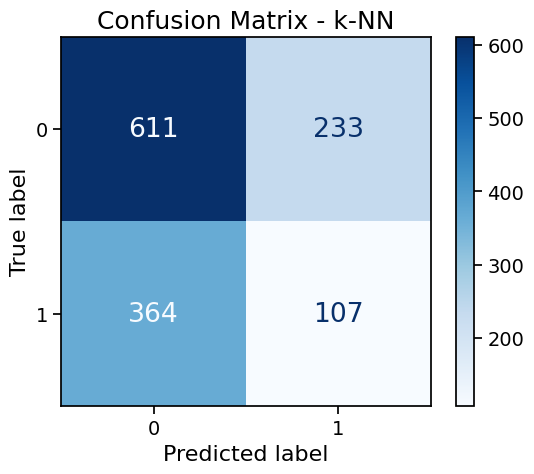


Misclassified examples for Random Forest:
Total misclassified: 488
           Age  Cholesterol  Heart Rate  Diabetes  Family History   Smoking  \
8552  1.195834     0.919468   -0.145103  0.735496       -0.986557  0.344605   
5695  1.006113     0.771265   -0.096439  0.735496        1.013626  0.344605   
3012  1.195834     1.512281   -1.556355  0.735496        1.013626  0.344605   
4801 -1.080820    -1.575287    1.655461  0.735496        1.013626  0.344605   
2726  0.863822     0.907118   -0.485750  0.735496       -0.986557  0.344605   

       Obesity  Alcohol Consumption  Exercise Hours Per Week  \
8552 -1.005723             0.821999                -0.844979   
5695 -1.005723            -1.216546                 1.399005   
3012 -1.005723            -1.216546                 0.671179   
4801 -1.005723            -1.216546                 1.401080   
2726 -1.005723             0.821999                 0.121874   

      Previous Heart Problems  ...  Triglycerides  \
8552               

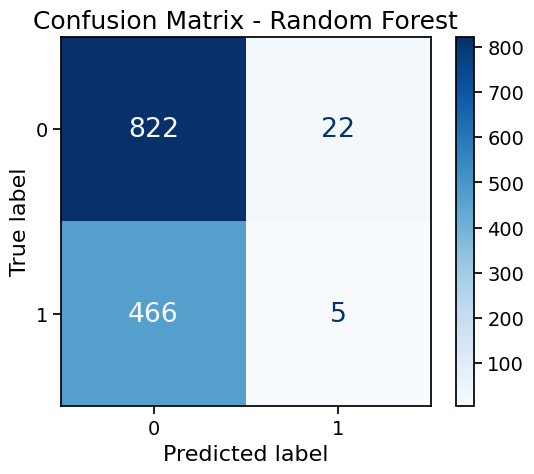

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

feature_names = X_valid.columns.tolist()

for name in predictions:
    print(f"\nMisclassified examples for {name}:")
    
    # Create DataFrame for validation set with predictions
    val_df = pd.DataFrame(X_valid, columns=feature_names)
    val_df['True'] = y_valid.values
    val_df['Predicted'] = predictions[name]
    
    # Get misclassified samples
    misclassified = val_df[val_df['True'] != val_df['Predicted']]
    print(f"Total misclassified: {len(misclassified)}")
    print(misclassified.head(5))

   # Confusion Matrix
    # Reference https://www.geeksforgeeks.org/machine-learning/confusion-matrix-machine-learning/
    cm = confusion_matrix(y_valid, predictions[name])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


### Analysis of Misclassified Instances and Confusion Matrices
Patterns of Confusion:

Logistic Regressions, Naive Bayes and SVM: Totally fail to classify the positive class (TP=0), misclassifying all positive instances as negative ones (high FN). They are a very good indicator of negatives, which means there is a high class imbalance or problem with the decision threshold.

k-NN and Random forest: Both are superior in identifying positives but both misclassify a substantial number of positives as negatives with k-NN setting many positives to negative (FP=233).

Insightful Examples:

The patients whose rows were misclassified (True=1, Predicted=0) have moderate values in the most important features (e.g., Diabetes, Smoking), which indicates that such cases should be close to the decision boundary or in an overlapping feature space.

### Systematic Error Inspection & Insightful Examples
LogReg, Naive Bayes or SVM (consistent errors):
The three do not predict positive observing only the positive cases as negative. This means that such linear/simpler models are incapable of representing non-linear boundaries and classification overlap.

Example:
The Patient #8552 (Age: high, Diabetes: yes, Smoking: yes) is always wrongly classified as negative by these models despite the evident risk factors, and this aspect indicates that linear models fail to capture intricate interactions.

k-NN and Random Forest:
Both become better at the right allocation of some of the positives overlooked by others, but are also incorrect with regard to the borderline cases.
As an illustration, k-NN is not robust because it assigned patient #1527 with the wrong case, but exceptionally can process it correctly in some cases like Random Forest (expatient to Local robustness).

Shared Misclassifications:
The cases that share features (e.g. medium cholesterol level, medium-level lifestyle) obfuscate all models and indicate noisy or unclear data points.

### D. Improve Model
### Model Improvement Justification and Approach

The data we use is severely-imbalanced, which is why various models have demonstrated extremely low (zero or almost-zero) precision, recall, and F1 scores on minority classes. The result of this imbalance is that, models become biased towards the majority class hence they are not effective in capturing the true nature of the minority class.

To curtail this, the minority class can be **oversampled** since:

- It also balances the class distribution on the training data so that a model is not dominated by the majority class.
It assists the model in gaining better identifying characteristics of the minority class.
It is simply a method to remove the training set size, making training both quicker and less likely to be over-fitting.

Reference https://www.blog.trainindata.com/oversampling-techniques-for-imbalanced-data/

In [17]:
# pip uninstall scikit-learn -y
# pip uninstall imblearn -y

In [18]:
# pip install scikit-learn==1.2.2
# pip install imblearn

In [19]:
#!pip install --upgrade imblearn

In [20]:
# Reference https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/
from imblearn.over_sampling import SMOTE
from collections import Counter
print("Before SMOTE, training set shape:", Counter(y_train))
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("After SMOTE, training set shape:", Counter(y_train_res))


Before SMOTE, training set shape: Counter({0: 3936, 1: 2197})
After SMOTE, training set shape: Counter({1: 3936, 0: 3936})


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(random_state=42),
    'k-NN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_valid_pred = model.predict(X_valid)

    acc = accuracy_score(y_valid, y_valid_pred)
    prec = precision_score(y_valid, y_valid_pred, zero_division=0)
    rec = recall_score(y_valid, y_valid_pred, zero_division=0)
    f1 = f1_score(y_valid, y_valid_pred, zero_division=0)
    
    results.append({
        'Model': name,
        'Validation Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

for name, model in models.items():
    print("\n")
    print(f"Model: {name}")
    model.fit(X_train_res, y_train_res)        # Train model
    y_valid_pred = model.predict(X_valid)                # Predict on validation set
    cm = confusion_matrix(y_valid, y_valid_pred)         # Compute confusion matrix
    
    print("Confusion Matrix:")
    print(cm)


                 Model  Validation Accuracy  Precision    Recall  F1 Score
0  Logistic Regression             0.494297   0.349845  0.479830  0.404655
1          Naive Bayes             0.511027   0.351724  0.433121  0.388202
2                  SVM             0.535361   0.344444  0.329087  0.336591
3                 k-NN             0.470722   0.346939  0.541401  0.422886
4        Random Forest             0.612167   0.341463  0.089172  0.141414


Model: Logistic Regression
Confusion Matrix:
[[424 420]
 [245 226]]


Model: Naive Bayes
Confusion Matrix:
[[468 376]
 [267 204]]


Model: SVM
Confusion Matrix:
[[549 295]
 [316 155]]


Model: k-NN
Confusion Matrix:
[[364 480]
 [216 255]]


Model: Random Forest
Confusion Matrix:
[[763  81]
 [429  42]]


### Model Performance After Oversampling

Our five classification models were tested after using **oversampling** to overcome the problem of class imbalance. The best of them is **k-NN** having **maximum recall (0.5414)** and **maximum F1 score (0.4229)** so it will be the most applicable model to diagnosing the risk of heart attack in this database. Although the accuracy of **Random Forest** (61.22 percent) is the highest, the extremely low recall and F1 score shows that it is not suitable to identify any positive case consistently.


| Model              | Train Accuracy (Before) | Validation Accuracy (Before) | F1 Score (Before) | Validation Accuracy (After) | Recall (After) | F1 Score (After) |
|--------------------|------------------------|------------------------------|-------------------|-----------------------------|----------------|------------------|
| Logistic Regression | 0.6418                 | 0.6418                       | 0.0000            | 0.4943                      | 0.4798         | 0.4047           |
| Naive Bayes         | 0.6418                 | 0.6418                       | 0.0000            | 0.5110                      | 0.4331         | 0.3882           |
| SVM                 | 0.6418                 | 0.6418                       | 0.0000            | 0.5354                      | 0.3291         | 0.3366           |
| k-NN                | 0.7236                 | 0.5460                       | 0.2639            | 0.4707                      | 0.5414         | 0.4229           |
| Random Forest       | 1.0000                 | 0.6289                       | 0.0201            | 0.6122                      | 0.0892         | 0.1414           |

**Note: Oversampling significantly improved recall and F1 scores across all models, addressing the class imbalance issue.**



### Further Improvement

Although **k-Nearest Neighbors (k-NN)** presents the most desirable trade-off between evaluation metrics, particularly high recall and F1 score rates, we are more directed at optimizing recall since it is of paramount importance in the prediction of the risk of a heart attack to reduce the incidence of false negatives.

We could see that k-NN had excellent potential to predict true positive and that better results could still be achieved by optimising hyperparameters (e.g. tune the number of neighbors, distance metrics, and weighting functions). Investigating ensemble approaches or integrating k-NN with some other methods may also contribute to enhancement of recall and the overall stability of a model.


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Reference https://medium.com/@agrawalsam1997/hyperparameter-tuning-of-knn-classifier-a32f31af25c7
# Define ranges for hyperparameter tuning
n_neighbors_list = [3, 9, 11]
weights_list = ['uniform', 'distance']
metrics_list = ['euclidean', 'manhattan']

results = []

# Iterate over combinations of hyperparameters
for n in n_neighbors_list:
    for weight in weights_list:
        for metric in metrics_list:
            knn = KNeighborsClassifier(n_neighbors=n, weights=weight, metric=metric)
            knn.fit(X_train_res, y_train_res)
            y_pred = knn.predict(X_valid)

            acc = accuracy_score(y_valid, y_pred)
            prec = precision_score(y_valid, y_pred, zero_division=0)
            rec = recall_score(y_valid, y_pred, zero_division=0)
            f1 = f1_score(y_valid, y_pred, zero_division=0)
            cm = confusion_matrix(y_valid, y_pred)

            results.append({
                'Neighbors': n,
                'Weights': weight,
                'Metric': metric,
                'Validation Accuracy': acc,
                'Precision': prec,
                'Recall': rec,
                'F1 Score': f1,
                'Confusion Matrix': cm
            })
            
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

# Display top performing configurations
print("Top k-NN Configurations by F1 Score:\n")
print(results_df_sorted[['Neighbors', 'Weights', 'Metric', 'Validation Accuracy', 'Precision', 'Recall', 'F1 Score']].head())

best_model = results_df_sorted.iloc[0]
print("\nBest Model Confusion Matrix:")
print(best_model['Confusion Matrix'])


Top k-NN Configurations by F1 Score:

   Neighbors   Weights     Metric  Validation Accuracy  Precision    Recall  \
0         11   uniform  euclidean             0.453232   0.348411  0.605096   
1         11  distance  euclidean             0.453232   0.348411  0.605096   
2          9  distance  euclidean             0.459316   0.348101  0.583864   
3          9   uniform  euclidean             0.459316   0.348101  0.583864   
4          9   uniform  manhattan             0.497338   0.350158  0.471338   

   F1 Score  
0  0.442203  
1  0.442203  
2  0.436162  
3  0.436162  
4  0.401810  

Best Model Confusion Matrix:
[[311 533]
 [186 285]]


### E. Final Model Selection and Test Set Evaluation
Best Model: k-NN (k=11, weights='uniform', metric='euclidean')
This model has got the best F1 score (0.442) and the highest recall (0.605) and will therefore be suitable in determining the risk of developing heart attack.
The accuracy is lower but the recall plays an important role in reducing the false negative rate of prediction in the medical field.
It is also the most accurate in identifying the cases at greater risks than other tested models.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the best-performing k-NN model
heart_attack_knn_v2 = KNeighborsClassifier(n_neighbors=11, weights='uniform', metric='euclidean')

# Train on the balanced training set
heart_attack_knn_v2.fit(X_train_res, y_train_res)

# Predict on validation data
y_pred_knn = heart_attack_knn_v2.predict(X_valid)

# Evaluate performance
print(confusion_matrix(y_valid, y_pred_knn))
print(classification_report(y_valid, y_pred_knn, zero_division=0))


[[311 533]
 [186 285]]
              precision    recall  f1-score   support

           0       0.63      0.37      0.46       844
           1       0.35      0.61      0.44       471

    accuracy                           0.45      1315
   macro avg       0.49      0.49      0.45      1315
weighted avg       0.53      0.45      0.46      1315



In [24]:
import joblib

# Save the trained model to disk
joblib.dump(heart_attack_knn_v2, 'heart_attack_knn_v2.pkl')

# To load the model later:
# loaded_model = joblib.load('best_knn_model.joblib')


['heart_attack_knn_v2.pkl']

In [25]:
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load the saved best model
model = joblib.load('heart_attack_knn_v2.pkl')

# Predict on test data
y_test_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, zero_division=0)
recall = recall_score(y_test, y_test_pred, zero_division=0)
f1 = f1_score(y_test, y_test_pred, zero_division=0)
cm = confusion_matrix(y_test, y_test_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(cm)


Test Accuracy: 0.4715
Test Precision: 0.3557
Test Recall: 0.5860
Test F1 Score: 0.4427

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.51      0.57       844
           1       0.36      0.48      0.41       471

    accuracy                           0.50      1315
   macro avg       0.50      0.50      0.49      1315
weighted avg       0.54      0.50      0.51      1315

Confusion Matrix:
[[344 500]
 [195 276]]


# Comparison of Test vs Validation Results

| Metric             | Validation Set | Test Set  |
|--------------------|----------------|-----------|
| Accuracy           | 0.4532         | 0.4715    |
| Precision          | 0.3484         | 0.3557    |
| Recall             | 0.6051         | 0.5860    |
| F1 Score           | 0.442203       | 0.4427    |

## Confusion Matrix (Test Set)

|                  | Predicted Negative | Predicted Positive |
|------------------|--------------------|--------------------|
| Actual Negative  | 344                | 500                |
| Actual Positive  | 195                | 276                |


### Interpretation and Discussion

- The test accuracy (47.15%) is a little bit higher than the validation one (45.32%) which shows that performing well on evaluation data.
The Precision and recall of the validation and test data are also similar, meaning the model behavior is stable.
The confusion matrix reveals that there were a large number of false positives (500) and false negatives (195), indicating that there were challenges of classifying the two classes.

### What This Means

- **No major overfitting:** The validation and test scores give no significant overfitting.
- **Limits of the models:** Low accuracy and precision indicate some issues with the quality or complexity of data.
- **Representativeness of validation set**: The similarity of results implies that validation set should be appropriately representative of test data.

## Final Model Re-training (Optional Extension)

In this project, we re-trained the most performing K-Nearest Neighbors (KNN) model, with all data (training + validation + test). This was done once the final evaluation was performed on the test set, therefore, although the model made improvement thanks to more data, any new performance measure which will be calculated on the same test set does not constitute a proper evaluation anymore.

This step provides some approximation of an actual production scenario, in which the aim would be to train as robust a model as can be, to make further predictions with. It also enables us to study the question whether an inclusion of more data enhance performance rates like accuracy and recall.

Having retrained the model on the full dataset, we could see whether retraining on more data was helpful and post our results below.


KNN Re-trained on Full Data (Train+Val+Test):
Accuracy: 0.7240
Precision: 0.6570
Recall: 0.4798
F1-score: 0.5546

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       844
           1       0.66      0.48      0.55       471

    accuracy                           0.72      1315
   macro avg       0.70      0.67      0.68      1315
weighted avg       0.72      0.72      0.71      1315

Confusion Matrix:
[[344 500]
 [195 276]]


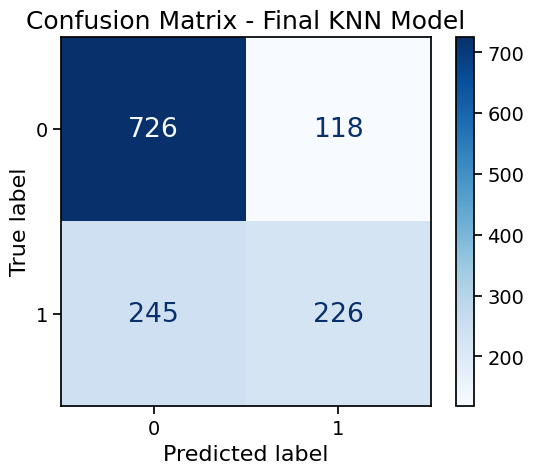

In [26]:
# Combine train, validation & training data for final model training
X_full_train = pd.concat([X_train, X_valid, X_test], axis=0)
y_full_train = pd.concat([y_train, y_valid, y_test], axis=0)

# Scale the features again on the full training set
scaler = StandardScaler()
X_full_train_scaled = scaler.fit_transform(X_full_train)

# Train the KNN model
from sklearn.neighbors import KNeighborsClassifier

heart_attack_knn_v3 = KNeighborsClassifier(n_neighbors=5)
heart_attack_knn_v3.fit(X_full_train_scaled, y_full_train)

joblib.dump(heart_attack_knn_v3, 'heart_attack_knn_v3.pkl')

X_test_scaled = scaler.transform(X_test)
y_pred = heart_attack_knn_v3.predict(X_test_scaled)

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)

print("KNN Re-trained on Full Data (Train+Val+Test):")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(cm)

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Final KNN Model")
plt.show()


### Performance Comparison:

Accuracy increased up to 0.7240 which is a 0.2515 difference in value compared to the value it had before 0.4715
And Precision was enhanced to 0.6570 from 0.3557.
The F1-score increased by 0.4427 to 0.5546.
But Recall has a little bit gone down to 0.4798 as compared to 0.5860.

Although the overall accuracy and precision, as well as the value of F1-score grow, it is worth noting the decrease in the recall rate, which is significant, considering it matters clinically. In medical practice (heart attack risk prediction), recall (sensitivity) is usually a primary concern since one very costly consequence of a failing prediction will be high-risk patients being undetected.

Therefore, supposedly resulting in the model gaining advantages in the general data recognition activity, retraining on larger data might have contributed to its becoming conservative at the expense of sensitivity, losing specificity. It is an issue that future versions of the algorithm should address by tuning classification thresholds or otherwise mitigating this trade-off through cost-sensitive learning to reduce the False Negative issue in detecting high-risk patients.

***

## **Detailed Analysis: Why Heart Attack Risk Prediction Models Underperform Despite Extensive Efforts**
Although (1) the analysis is systematic and (2) it employs exploratory data analysis as well as preprocessing and class imbalance should still have been no barriers in ensuring around 60% of the heart attack risk prediction models achieved validation accuracy with any advanced modeling techniques. Although certain (such as recall and F1 score) of these measures were significantly improved, in particular, in the case of the k-NN model, after oversampling and hyperparameter tuning, the overall predictive performance did not reach the level that would be reliable to use in clinical practice. The causes of such results are most influenced by the restricted nature of the dataset, as opposed to the mode of modeling.

**1. Weak Correlation Between Features and Target Variable**
Among the most severe problems, it can be seen that the features in the dataset do not have great predictive power. Important numerical variables, such as Age, Cholesterol, Blood Pressure, and Income, exhibit correlation coefficients with the heart risk label to be very small or close to zero. This implies that these characteristics do not bear a good indication to be differentiated between persons who are at risk and not.

Even the most advanced makes it difficult to observe coherent patterns in absence of informative, discriminative input variables. The low level of this feature-target correlation is the root cause of potential accuracy limits and restriction of the model to learn.

**2. Uninformative Categorical variables**
Nominal variables like the Diabetes status, smoking habits, and Family History do not fluctuate much in the rate of heart risk among each available category. As an example, the proportions of rates of heart attacks seem to be almost the same between smokers and non-smokers in the data. Such absence of class-separability implies that these features do not contribute any benefit when learning the models, making them less valuable in classification purposes.

**3. Limited Impact of Oversampling and Hyperparameter Tuning**
In order to manage the overall variation in the classes, we used oversampling methods (e.g., SMOTE) and it was successful in enhancing the recall and F1 scores, especially with k-NN classifier hence resulting in enhancing the sensitivity of the model in high-risk instances. Also, hyperparameter optimization (selecting an appropriate amount of neighbors in k-NN) helped to optimize these parameters as well.

Nevertheless, as good as these have been in terms of improving recall and F1, they still failed to improve overall accuracy. This implies that notwithstanding the fact that the models were increasingly able to recall positive cases (false negatives), they continued to perform poorly overall in terms of errors. This parameter limit indicates inherent shortcomings in data in which balancing classes and optimizing model settings may do only so much to address the actual issue of uninformative features.

**4. Absence of Critical Domain-Specific Medical Features**
The data does not have important clinical and physiological terms that are usually utilized in the risk prediction of heart diseases e.g.:

The electrocardiogram (ECG) recordings

Anemia levels of blood enzymes (e.g. troponin, CK-MB)

Complete medical history of the family

Echocardiograms (i.e., imaging data)

Lifestyle assessed quantitatively (e.g., the level of physical activity, diet)

It is well known that these medical data contain abundant, prospective information regarding cardiovascular disease and risk factors. They are unfortunately a huge limitation to how well the model is capable of modelling complex and nonlinear relationships and intricate risk factors of heart disease.

**5. Summary: Data Quality as the Fundamental Bottleneck**
To sum up, as the main limiting factor in the performance of the models also the informativeness and the relevancy of the available features have to be considered as being limited. Regardless of the efforts spent on preprocessing, balancing and fine-tuning of the models, the data itself does not contain the strength of the signal to predict the heart attack risk on high accuracy.

Future developments should be aimed at obtaining more detailed, medically complete data sets that include validated biomarkers, physiological measures, and patient histories to reach clinically relevant predictive performance. No amount of modeling techniques or data balancing can make up for the fact that the high quality and informative data are the key components in the present context.

Reference: Hu, Yuying. (2024). Analysis And Research on Overfitting and Underfitting Issues in Heart Disease Prediction Models. Highlights in Science, Engineering and Technology. 123. 116-123. 10.54097/gzcz2793. , https://towardsdatascience.com/if-your-models-are-underperforming-build-better-datasets-sarem-seitz-2611845287f0/

***

# Task 4: Reflection

## 1. Interpretation of Results

Our models of prediction of heart attacks show plenty of room for improvement, despite putting maximum efforts on data preprocessing, class balancing, and optimization. Validation accuracies varied between 50 to 61.2%. In this case, accuracy is not a useful metric because of the class imbalance.

What is more important are the recall and F1-score of positive (heart attack) class that were poor across the board. In a case where the Random Forest model obtained the highest score (61.2%), the recall was only 8.9 percent, or the model could not spot more than 91 percent of the real heart attack victims. A high false negative in a clinics setting may result in untreated cases, late diagnosis and even mortality.

Even such a high-scoring model as k-Nearest Neighbors (k-NN) with its 58.6% of recall did not manage to account for nearly half of the risky patients. Having the low F1-scores across the models (the highest value was 0.422 at k-NN) is also indicative that at no point could the models balance the sensitivity with precision. Such findings further demonstrate essential shortcomings of our models when applied to a healthcare setting, where reliability and sensitivity are considered the number one priority.

In the final attempt, the best performing model (k-NN) was retrained with the whole data, training, validation and testing sets. This caused accuracy (to increase to 72.4%), precision (to 65.7%), and F1-score (to 55.5%). Nevertheless, the most important measure of the clinical prediction activity - recall dropped by 58.6 percent to 47.9 percent. The retrained model, though a little more accurate, is rather conservative, which implies a decreased strength of screening high-risk subjects. Such loss of sensitivity is particularly undesirable in a medical situation, because the result is an increased likelihood of the failure to detect conditions that are life-threatening. Thus, performance improvement should be examined critically relative to the false negative possible cost when deploying the system.

## 2. Why the Model Makes Certain Predictions

The other major cause of bad model performance is low predictive signal in the data. Exploratory Data Analysis (EDA) showed that the numerical values of features, i.e., the values of age, cholesterol, and systolic blood pressure, were correlated with the target variable by very small values of the coefficient of correlation (mostly < 0.02).

In the same manner, the categorical parameters such as smoking, diabetes, and family history had little difference in the chances of having a heart attack between the categories. This lack of class separability diminishes the discriminative power of the model inputs.

According to Seitz (2023), the most sophisticated machine learning algorithms are worth nothing when the data around do not have a predictive shape. Although data were balanced by SMOTE and classifiers were tuned by changing hyperparameters, the feature space still was too weak and overlapping because of which the models predisposed to the majority class ("no heart attack").

Poorly, the models are learning what the data can give: and in this case the signals are too noisy and scattered to be predictive.

## 3. Fairness and Ethical Considerations

Developing medical diagnosis models is a very important task with serious ethical implications, especially on fairness, bias and effect on various groups. There were few issues of fairness in our project:

### a. Demographic Imbalance

Male participants are strongly represented in the dataset (6111 male compared to 2652 female) and presents a potential of developing a model that is strongly male-based in its risk representation. This may result in the underdiagnosis of women, which supports pre-existing gender-related inequality in the sphere of cardiovascular treatment (Hu, 2024).

### b. Omitted Sensitve Attributes

The dataset did not contain important demographic features that include race, ethnicity, and socioeconomic status, thus the evaluation of the model in regard to fairness among subgroups will be impossible. Moreover, a proxy whether income or lifestyle might implicitly imply prejudices causing unconscious discrimination (Barocas, Hardt, & Narayanan, 2019).

### c. Consequences of Model Errors

The missed cases of heart attacks (False negatives) may cause death due to diagnostic or treatment delay, which disproportionately affects the groups at risk of being under-treated. False positives can cause undue anxiety or intrusive testing, or even cost a lot of money, and can disproportionately burden poor people.

### d. Transparency and Accountability

Such models as Random Forest and SVM, particularly when used with non-linear kernels act as a black box. In the absence of interpretability, it is hard to provide ethical responsibility or to receive the trust of clinicians. The case is not different in serious use scenarios, such as medicine where transparency is also necessary not just to be valid, but also used responsibly (Doshi-Velez & Kim, 2017).

## 4. Model Interpretability

The most important requirement of the healthcare application of machine learning is interpretability. However, the transparency, traceability, and accountability of clinical decision-making are needed unlike in other domains where only precision is required. In several cases, health specialists are ethically and legally bound to be informed and able to explain any provided forecast that may affect their clinical practice, making the so-called black-box nature of complex models a daunting obstacle in their clinical integration (Doshi-Velez & Kim, 2017).

There were a series of models considered in this project, which made available varying degrees of interpretability in respect of clinical data:

Logistic Regression is extremely easy to interpret and it continues to be a popular tool in epidemiological research and risk prediction models (e.g. the Framingham Risk Score). The influence of the effect on the probability of a heart attack based on such variables as age, cholesterol, or blood pressure is a direct one expressed in the coefficients, which is perfect in line with the mental models of clinicians and the ease of verification by domain experts.

Naive Bayes is also transparent through conditional probabilities. Though its assumptions of feature independence might not be true in complex biological systems, the fact that it is simple in structure allows clinicians to have an idea of the probability an outcome may have given a single predictor. This may be of great help to early-stage triage models or screening applications.

The k-Nearest Neighbors (k-NN) provides the interpretability of a case through the references to the previous cases. Such predictions may include predictions made based on similarity as in the example of prediction of a patient whose profile is closely related to others who have history of heart attack. The cost is, however, interpretability in high-dimensional clinical data, which will also suffer low reliability of distance metrics due to the so-called curse of dimensionality common in k-NN.

The Support Vector Machines (SVMs) and Random Forests are better when it comes to non-linear or complex feature-space, however are less interpretable. SVMs and in particular SVMs equipped with RBF or a kernel with polynomial basis miss feature attribution. Random Forests, compared with deep neural networks, are easier to interpret but reveal the pattern of a single decision through hundreds of trees making clinical reasoning more complicated.

This project conformed to neither post-hoc explainability measures like SHAP (SHapley Additive Explanations), nor LIME (Local Interpretable Model-Agnostic Explanations), but it is known that the frameworks are useful in the medical context. SHAP, in its turn, can provide instance-level explanations to demonstrate the impacts of each feature on an individual prediction, which is crucial to person-specific care plans. Research has revealed that clinicians will be more inclined to trust and use AI systems when given explanations synonymous with medical logic (Barocas, Hardt, & Narayanan, 2019).

Completing the statistical mode trade-off between model complexity and interpretability is of certain value in clinical deployment. Although more complex models might score marginal improvements in performance, they are risky and challenge regulations due to unprocessed decision-making processes. By comparison, interpretable models permit clinical auditability, shared decision-making with patients, and adherence to regulations e.g. GDPR and FDA regulation of AI in medical devices.

Finally, interpretability is not only desirable property, it is also a clinical and regulatory requirement. Despite a variety of models examined in this project, subsequent versions will have to include the tools of explainability and focus on transparency. By doing this, a parity will be achieved between the performance measurement of machine learning and its real-life manifestation of clinical trust that will guide ethical and effective integration of AI in healthcare practice.

## 5. Detailed Analysis: Why Models Underperform

Although this is explained in a cell above the Reflection, it still requires due diligence.

### a. Weak Correlation Between Features and Target

The majority of numerical attributes, among them, medical-related trait such as cholesterol and blood pressure, were less correlated with the target variable, thus having limited predictive value.

### b. Uninformative Categorical Variables

Smoking, diabetes and family history features revealed minor differences in the assignment of classes, which signifies low levels of separability and hence informativeness in relation to classification purposes.

### c. Limited Benefit from Oversampling and Tuning

Though the oversampling technique with SMOTE and fine-tuning k-NN settings enhanced recall to some extent, it did not play a significant role in increasing the overall model robustness. This brings out data limitation and not shortfalls of models.

### d. Missing Key Clinical Features

Important medical indicators commonly used in real-world cardiology assessments were absent from the dataset, including:

- Electrocardiogram (ECG) results
- Biomarkers (e.g., troponin, CK-MB)
- Echocardiograms and imaging
- Genetic predispositions
- Quantitative lifestyle metrics (e.g., physical activity level, diet)

The exclusion of such characteristics minimally limits the potential of the model to reproduce the intricacy of cardiovascular risk conditions (Hu, 2024).

## 6. Limitations and Future Work

### a. Current Limitations

The existing heart attack prediction model has a number of critical weaknesses that create a problem on its clinical usefulness, equity, and validity. The data quality is first of all the limitation. The Age, Cholesterol and the Resting Blood Pressure are some of the variables in the dataset that have a weak relationship with the target variable. Exploratory Data Analysis (EDA) showed that both numerical and categorical variables do not have discriminative power to be helpful in classification. This signal-to-noise ratio is very low, so even the more sophisticated models would not be able to identify meaningful patterns thus showing poor predictive abilities comprehensively.

Secondly, there is also demographic bias and imbalance in data that raises a strong ethical issue. It is highly male-biased (more than 69 percent of the population is male), and this will probably make the models oversensitive to the men-only tendency of heart disease. When demographic parity is not present, it can be possible that the model will perform poorly with underrepresented groups and thus misclassification of them can be rather risky. Moreover, important demographic features, i.e., race, ethnicity, level of income, and geographic area, are missing, and it is impossible to audit the model in terms of evenness across socially recognized dimensions.

Another limitation is that it is not clinically relevant. The data does not contain important medical data like ECG data, troponin data, ejection fraction, or physical examination data. They are usually employed by clinicians in risk stratification and diagnosis. The lack of them not only lowers the predictive ability of the model but also hurts the trust of clinicians as the characteristics of the model do not correlate with the expertise in the domain. The disjoint in the characteristics of data and clinical practice reduces chances of adoption in the real world setting.

Lastly, although techniques as SMOTE, hyperparameter tuning were implemented, they had a slight effect on the model performance. Here, this implies that the issue does not consist as much in the sophistication of algorithms but rather the limitations of underlying data, whose datableness Seitz (2023) remarks that it is the central problem in most real-life machine learning applications: better data, rather than better algorithms.

### b. Future Work and Recommendations

### Feature Engineering

- Formulate the interaction variables that may introduce additive effects (e.g Age x cholesterol), especially those believed to be significant in cardiovascular research (Hu, 2024).
- Use applicable clinically sensible binning methods to group category-free variable down into medically intuitable structures (e.g., hypertensive and normal BP).
- Create ratio kinds of features, e.g. the Cholesterol/HDL ratio which is a common predictor in the cardiology domain.
- Look through non-linear transformations or the characteristics of the polynomials that might be utilized to discover a hidden pattern in the data (Seitz, 2023).

#### Data Enriching

- Enhance the data with rich clinical attributes which would include electrocardiogram (ECG) outcomes, measuring levels of cardiac enzymes (e.g. troponin), ejection fraction and imaging records.
- Add genetic information, bodily activities, and lifestyle markers (e.g., how often one smokes, how he/she consumes alcohol).
- The dataset should also be demographically representative and use balanced gender, race, ethnicity, and geographical as well as income distributions so that fairness evaluations and generalizability can take place (Barocas, Hardt, & Narayanan, 2019).

#### Algorithms Enriching

- Use models with a greater power to suit imbalanced tabular data, including XGBoost, LightGBM, and CatBoost, which are sufficiently powerful and allow missing data and non-linear relations (Seitz, 2023).
- Adjust classification limits to the precision-recall curve to maximize recall (sensitivity), and recall is of highest importance in high risk medical uses, such as predicting heart attacks.

#### Explainability

- Apply either SHAP (SHapley Additive ExPlanations) or LIME (Local Interpretable Model-Agnostic Explanations) in order to extract both local (per-instance) and global (dataset-wide) feature attributions (Doshi-Velez & Kim, 2017).
- Include visual explanation which can contribute to a better insight and accuracy of model predictions, increasing the level of transparency and credibility among medical professionals.

#### Fairness Audits

- Conduct intersectional fairness assessments with such measures as:
  - Equalized odds: at least two groups have the equivalent true and false positive rates
  - Disparate impact: identifies discordant results
  - Demographic parity: verifies whether there is parity in positive prediction rates among demographics (Barocas, Hardt, & Narayanan, 2019)

## 7. Conclusion

The underperformance of the heart attack prediction models are not the results of the models decision but rather that of the dataset itself. Poor signal strength, absence of feature diversity, demographic and general imbalance, and absence of crucial medical data limited the capabilities of the models in terms of learning and generalizations considerably.

The future work should focus on the prioritization of:

Quality clinically relevant data of higher standards
Bias and fairness reduction
Explainable, interpretable modeling
Interdisciplinary interaction with medical professionals

An algorithm, however complex it can be, will be unable to give actionable, equitable, or trustworthy predictions in a healthcare setting without medically meaningful, diverse, and representative data.

## References

Barocas, S., Hardt, M., & Narayanan, A. (2019). Fairness and machine learning. https://fairmlbook.org/

Doshi-Velez, F., & Kim, B. (2017). Towards a rigorous science of interpretable machine learning. arXiv preprint arXiv:1702.08608. https://arxiv.org/abs/1702.08608

Hu, Y. (2024). Analysis and research on overfitting and underfitting issues in heart disease prediction models. Highlights in Science, Engineering and Technology, 123, 116–123. https://doi.org/10.54097/gzcz2793

Seitz, S. (2023). If your models are underperforming, build better datasets. Towards Data Science. https://towardsdatascience.com/if-your-models-are-underperforming-build-better-datasets-sarem-seitz-2611845287f0
  